# Part 1: Setting up the Project

### Importing the necessary libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import statistics # this is needed to check basic statistical analysis such as the mode
import seaborn as sns # seaborn is a data visualization library based on matplot and will allow us to create statistical graphics 
from sklearn.preprocessing import OneHotEncoder as ohe # this will allow us to code categorical data in binary format

from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [2]:
sns.set(color_codes=True) # this command will add asthetic backgrounds to our data visualizations
%matplotlib inline 
# instructs python to display the graphs in jupyter

In [3]:
AI = pd.read_csv('AxisInsurance.csv') # import the dataset and name the dataset AI

# Part 2: Exploratory Data Analysis

In [4]:
AI.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
AI.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


The above two codes gives us an idea of the size and structure of the dataset.  We now know that there are 7 colums (excluding the index). We also see that there are 1338 rows or entries (rows 0 to 1337). The variables appear to be the age and sex of the respondents, their BMIs, number of children, whether or not they are a smoker, their region within the US, and their individual medical costs billed to health insurance. We will explore the data further using .shape, .info, .describe....

In [6]:
AI.shape #reinforces the physical count we got from .head + .tail

(1338, 7)

In [7]:
AI.info() 
'''this code tells us the data type of each of the 7 variables. We may have to convert objects 
(ie. sex) to integers later on in order to compare integers with other integers, so knowing the data type is pretty important.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


'this code tells us the data type of each of the 7 variables. We may have to convert objects \n(ie. sex) to integers later on in order to compare integers with other integers, so knowing the data type is pretty important.'

In [8]:
AI.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


AI.describe will give us the 5 point summary of the data. With it, we can verify the additional information we were provided with the data, such as, the max age is 64 (it is stated 65+ receive insurance from the government). We also see that the minimum age is 18. The number of children range from 0-5, BMI ranges from unhealthily underweight - 15.96 to unhealthily overweight - 53.13. Charges range from $1,121.87 to $63,770.43. Now that we have a good idea of the size, shape and ranges of the data, we need to examine the dataframe for missing values and/or duplicate values...

### Checking for missing values and/or duplicates...

In [9]:
AI.isnull().sum() # This will tell us if there are missing values in any of the columns

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
dupes = AI.duplicated() #This will check to see if any of the rows are duplicates
sum(dupes)

1

We now know that there are zero missing values but python is telling us that it found 1 duplicate row of data. In order to discover which exact row is the duplicate, we can create a unique dataframe key ('CustomerID'), run a loop that references the unique key, and print the row numbers that are found to be duplicated for a visual inspection. 

In [11]:
AI['CustomerID'] = range(1, len(AI.index)+1) # This will create a unique key for the dataframe 
AI.head() # checking to see if the new column was added

,age,sex,bmi,children,smoker,region,charges,CustomerID
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,4
4,32,male,28.880,0,no,northwest,3866.85520,5


In [12]:
AI['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
for index in range(0,len(AI)): # The for loop will increase the ID value for each record
    for index2 in range(index + 1, len(AI)):
        if AI['age'].loc[index] == AI['age'].loc[index2] and AI['sex'].loc[index] == AI['sex'].loc[index2] and AI['bmi'].loc[index] == AI['bmi'].loc[index2] and AI['children'].loc[index] == AI['children'].loc[index2] and AI['smoker'].loc[index] == AI['smoker'].loc[index2] and AI['region'].loc[index] == AI['region'].loc[index2] and AI['charges'].loc[index] == AI['charges'].loc[index2]:
            AI['ID'].loc[index] += 1
            AI['ID'].loc[index2] += 1
            print(AI['CustomerID'].loc[index], 'This entry and')
            print(AI['CustomerID'].loc[index2], ' this entry are duplicates')
            print('')
    
# The loop iterates through the dataframe, comparing the first record against all the other records in the dataset and when a match is found both of their ID values are incremented.
# The loop then prints the unique key Customer ID of the first, and then matching entry, followed by an empty line (for neatness) before restarting the loop           
    

C:\Users\mulli\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


196 This entry and
582  this entry are duplicates



In [13]:
 AI.loc[[195,581], :] #Prints the duplicate rows... PLEASE NOTE that the CustomerID starts at 1, while python starts at 0, so we must subtract one from the output rows above

,age,sex,bmi,children,smoker,region,charges,CustomerID,ID
195,19,male,30.59,0,no,northwest,1639.5631,196,1
581,19,male,30.59,0,no,northwest,1639.5631,582,1


The visual inspection confirms that these two rows are identical, right down to fractions of the BMI and Charges. This is unlikely to be a coincidence and is most likely that this is a duplicate entry. To deal with this duplicate, we will first create a copy of the dataframe so that we preserve the integrity of the original in case we need to refer back to it later.  Once we create a copy, we can 'clean' the copy by removing this duplicate. 

In [14]:
AIC = AI.copy() # This creates a copy of the dataframe, C denotes 'clean', we will remove the duplicate row from this dataframe

In [15]:
AIC.drop([581], axis=0, inplace=True) 
# this removes the duplicate customers, specifically, it removes the record of their second purchase
# axis=0, inplace=True will make this deletion permanent

In [16]:
AIC.shape #check to see if the row drops are permanent, previously shape was (1338, 7), so we expect an output of (1337, 9)... 2 additional columns were added, so this is fine

(1337, 9)

One idiosyncrasy with this process is there is now a gap in the dataframe. It will go from row 580, skip 581 and continue to 582.  If we try the code "AIC.loc[[581], :]" we will get an error message saying the row is missing. To fix this, we can print row 582, then reset the index and then print row 581.  Row 581 should now be equivalent to row 582 BEFORE we reset the index. 

In [17]:
 AI.loc[[582], :] # Checking the values of row 582

,age,sex,bmi,children,smoker,region,charges,CustomerID,ID
582,39,male,45.43,2,no,southeast,6356.2707,583,0


In [18]:
AIC.reset_index(inplace=True) # This code resets the index so that it is now continuous from 0-177, previously the index went from 0-180 with the removed row values missing


In [19]:
AIC.loc[[581], :] #This should now NOT be an error message, but should give us the same output as the code above (old 582)

,index,age,sex,bmi,children,smoker,region,charges,CustomerID,ID
581,582,39,male,45.43,2,no,southeast,6356.2707,583,0


In [20]:
AIC.drop('ID',axis=1,inplace=True) # this drops the temporary ID columns since its no longer needed, keeps the dataframe cleaner
AIC.drop('index',axis=1,inplace=True)
AIC.drop('CustomerID',axis=1,inplace=True)

AIC.head() # check to see if the ID column is dropped...

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
dupes = AIC.duplicated() #This will double-check to see if any of the rows are duplicates
sum(dupes)

0

### Quantitative Analysis

In [22]:
AIC.shape # check to see if there are 1337 rows (1338 minus 1 duplicate)

(1337, 7)

In [23]:
print(AIC.mean()) # prints the mean of each numerical attribute

age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64


In [24]:
print(AIC.median()) # prints the median values of the numerical attributes

age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64


We know that with Normal Distribution, the Mean = Mode = Median, so we can already see that the first three variables MAY be close to being normally distributed. 

In [25]:
AIC.quantile(0.75) - AIC.quantile(0.25) # this will show us the IQR of each numerical attribute

age            24.00000
bmi             8.41000
children        2.00000
charges     11911.37345
dtype: float64

In [26]:
print(AIC.var())

age         1.972433e+02
bmi         3.721571e+01
children    1.453402e+00
charges     1.466608e+08
dtype: float64


Knowing the variances of the population is important in case we are required to conduct Tests of Variance (Chi square, F-ratio, ANOVA, etc) later on in the study

In [27]:
print(AIC.std())

age            14.044333
bmi             6.100468
children        1.205571
charges     12110.359656
dtype: float64


Again, knowing the standard deviations of the population is important because it may help determine which statistical tests we apply (ie Z-test vs T-test) later on in the study

### Univariate Analysis

Now that we are satisfied that the dataset is clean and free of duplicates (going forward, we will be using the AIC dataset because it exlcudes the duplicate entry), we can begin to examine each variable independently. 

**Age**

In [28]:
AIC['age'].describe() #will give us a five-point summary of the age variable. Range should be 18-64

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [29]:
print('The maximum age is', AIC['age'].max()) #This code will confirm what we learned above...
print('The minimum age is', AIC['age'].min())
print('The age range is', AIC['age'].max() - AIC['age'].min(), 'years')

The maximum age is 64
The minimum age is 18
The age range is 46 years


In [30]:
print(AIC['age'].mode())  # Prints the mode of Age

0    18
dtype: int64


The mode, or the most frequently occuring number, is 18. This could prove interesting because younger individuals potentially make fewer claims because they are in good health. As such, targeting younger people is a great strategic move for Axis. 

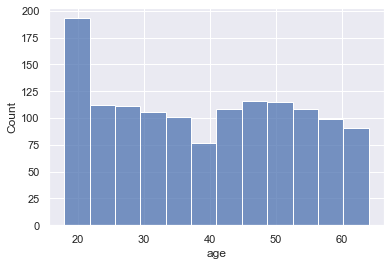

In [31]:
sns.histplot(AIC.age);

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


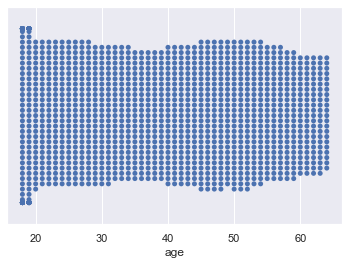

In [32]:
sns.swarmplot(data = AIC, x='age'); #This graph will give us a nice visual of how the data is dispersed


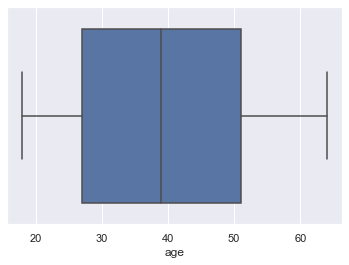

In [33]:
sns.boxplot(data = AIC, x ='age',); #This graph visualizes the 4 quadriles and shows any outliers

**Sex**

The sex variable is categorical and needs to be treated somewhat differently than a numerical variable such as age. We are interested in the frequencies, in this case, whether the policy holders are male and female. 

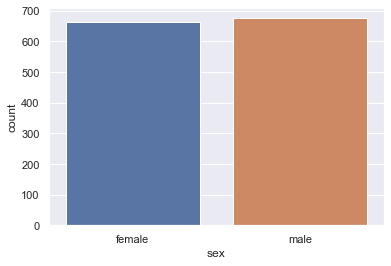

In [34]:
sns.countplot(data = AIC, x = 'sex'); #should give a visual frequency graph of male vs female

In [35]:
AIC['sex'].value_counts() #the above graphic suggests there are slightly more males than females, but this prompt will give us actual counts

male      675
female    662
Name: sex, dtype: int64

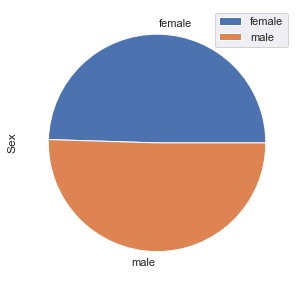

In [36]:
df_Sex = pd.DataFrame({'Sex': [662, 675],
                   'radius': [2439.7, 6051.8]},
                  index=['female', 'male'])
plot = df_Sex.plot.pie(y = 'Sex', figsize=(5, 5))   #creates a pie chart of the two sexes, which can be one of the easiest graphs for managers to understand

We may also wish to know the proportion of females in terms of the entire population and, in turn, the proportion of males.  In other words, what percentage of the population is female? What percentage of the population is male? Knowing the proportions is important when conducting statistical analysis on categorical data because many of the tests are proportion tests. We can determine these values with a simple arithmetic command: 

In [37]:
f = 662
m = 675

print('The proportion of females is', (f/(m+f)))
print('The proportion of males is', (m/(m+f)))



The proportion of females is 0.4951383694839192
The proportion of males is 0.5048616305160808


In [38]:
fpc = (f/(m+f)) # to make the proportions easier to read, we can convert directly to percentages and limit to 2 decimal places
mpc = (m/(m+f)) 

fpc = fpc * 100 # this moves the decimal place to positions to the right
mpc = mpc * 100

fpc = round(fpc, 2) # this will limit the output to 2 decimal places
mpc = round(mpc, 2)

print('The proportion of females is', (fpc), '%')
print('The proportion of males   is', (mpc), '%')


The proportion of females is 49.51 %
The proportion of males   is 50.49 %


**BMI**

In [39]:
AIC['bmi'].describe() #will give us a five-point summary of the bmi variable. 

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [40]:
print('The maximum bmi is', AIC['bmi'].max()) #This code will confirm what we learned above...
print('The minimum bmi is', AIC['bmi'].min())
print('The bmi range is', AIC['bmi'].max() - AIC['bmi'].min())

The maximum bmi is 53.13
The minimum bmi is 15.96
The bmi range is 37.17


In [41]:
print(AIC['bmi'].mode())  # Prints the mode of bmi

0    32.3
dtype: float64


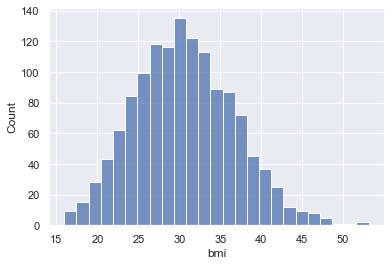

In [42]:
sns.histplot(AIC.bmi); #this plot will show a graphic representation of the distribution of bmi values

The data above appears to follow almost a normal distribution.  We use a distplot graphic to further investigate. 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

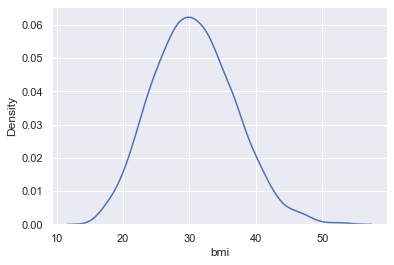

In [43]:
sns.distplot(AIC['bmi'], hist=False) # adding an argument to plot only frequency polygon

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


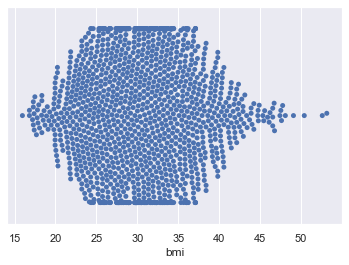

In [44]:
sns.swarmplot(data = AIC, x='bmi'); #This graph will give us a nice visual of how the data is dispersed

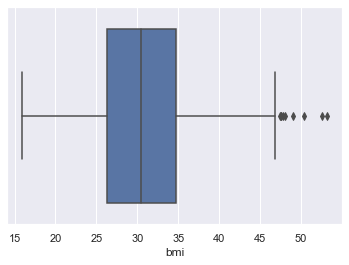

In [45]:
sns.boxplot(data = AIC, x ='bmi',); #This graph visualizes the 4 quadriles and shows any outliers

**Children**

In [46]:
AIC['children'].describe() #will give us a five-point summary of the children variable. 

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [47]:
print('The maximum number of children is', AIC['children'].max()) #This code will confirm what we learned above...
print('The minimum number of children is', AIC['children'].min())
print('The range for children is', AIC['children'].max() - AIC['children'].min())

The maximum number of children is 5
The minimum number of children is 0
The range for children is 5


In [48]:
print(AIC['children'].mode())  # Prints the mode of Age

0    0
dtype: int64


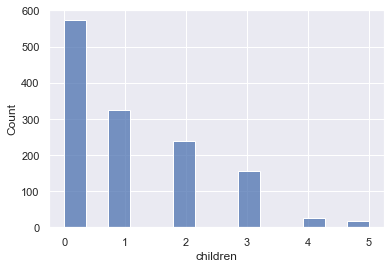

In [49]:
sns.histplot(AIC.children);

This is, perhaps, the best of the three graphs.  It shows that the data are clearly positively. Since most of the data are on the right, with a few smaller values showing up on the left side of the histogram, the data are skewed to the right. When data are skewed right, the mean is larger than the median. We already checked the mean and the median above, so it will be easy to compare the two with the following code.

In [50]:
a = AIC['children'].mean() # this code is a logical statement that will only print a message based on the size of the mean relative to the size of the median
b = AIC['children'].median()

if a > b: 
    print('The mean is larger than the median, therefore there is positive skewness')
    print(a, '>', b)
elif a < b:
    print('The mean is smaller than the median, therefore there is negative skewness')
    print(a, '<', b)
elif a == b:
    print('The mean is equal to the median, therefore there is no skewness')
    print(a, '=', b)

The mean is larger than the median, therefore there is positive skewness
1.0957367240089753 > 1.0


C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


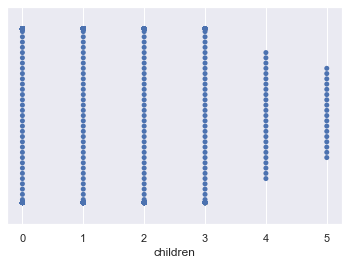

In [51]:
sns.swarmplot(data = AIC, x='children'); #This graph will give us a nice visual of how the data is dispersed

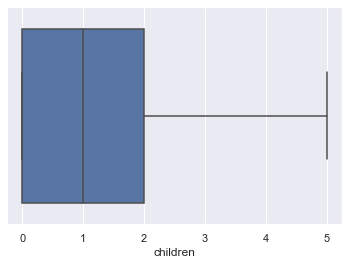

In [52]:
sns.boxplot(data = AIC, x ='children',); #This graph visualizes the 4 quadriles and shows any outliers

In [53]:
# This code will count the frequencies for each count

my_tab = pd.crosstab(index=AIC["children"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


The actual counts reinforce what the visual graphics have been saying about the data: the values are not evenly distributed, with most of the counts occuring between 0 and 2 children.

**Smoker**

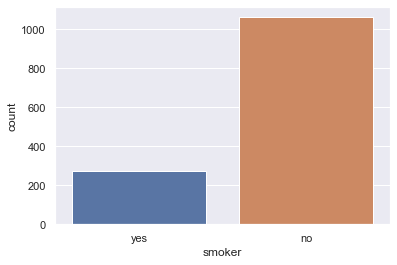

In [54]:
sns.countplot(data = AIC, x = 'smoker'); #should give a visual frequency graph of smoker (yes) vs nonsmoker (no)

In [55]:
AIC['smoker'].value_counts() #the above graphic suggests there are many more nonsmokers (no), than smokers (yes), but this prompt will give us actual counts

no     1063
yes     274
Name: smoker, dtype: int64

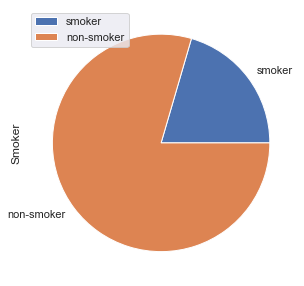

In [56]:
df_Smoker = pd.DataFrame({'Smoker': [274, 1063],
                   'radius': [2439.7, 6051.8]},
                  index=['smoker', 'non-smoker'])
plot = df_Smoker.plot.pie(y = 'Smoker', figsize=(5, 5))   #creates a pie chart of the two sexes, which can be one of the easiest graphs for managers to understand

In [57]:
s = 274
ns = 1063

print('The proportion of smokers is', (s/(s+ns)))
print('The proportion of non-smokers is', (ns/(s+ns)))


The proportion of smokers is 0.2049364248317128
The proportion of non-smokers is 0.7950635751682872


In [58]:
spc = (s/(s+ns)) # to make the proportions easier to read, we can convert directly to percentages and limit to 2 decimal places
nspc = (ns/(s+ns)) 

spc = spc * 100 # this moves the decimal place to positions to the right
nspc = nspc * 100

spc = round(spc, 2) # this will limit the output to 2 decimal places
nspc = round(nspc, 2)

print('The proportion of smokers is', (spc), '%')
print('The proportion of non-smokers is', (nspc), '%')

The proportion of smokers is 20.49 %
The proportion of non-smokers is 79.51 %


**Region**

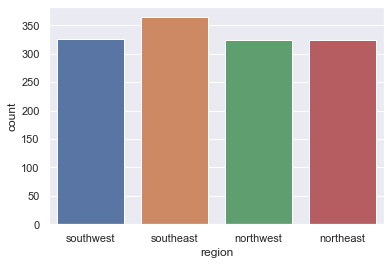

In [59]:
sns.countplot(data = AIC, x = 'region'); #should give a visual frequency graph of the four regions

In [60]:
AIC['region'].value_counts() #the above graphic suggests there are slightly more people in the southeast, with the other three regions looking very close, this will give us actual counts

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

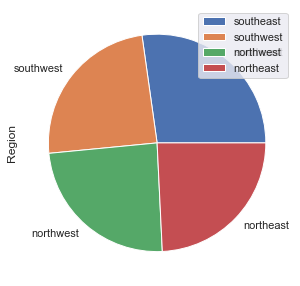

In [61]:
df_Region = pd.DataFrame({'Region': [364, 325, 324, 324],
                   'radius': [2439.7, 6051.8,6051.8, 6051.8 ]},
                  index=['southeast', 'southwest', 'northwest', 'northeast'])
plot = df_Region.plot.pie(y = 'Region', figsize=(5, 5))   #creates a pie chart of the two sexes, which can be one of the easiest graphs for managers to understand

In [62]:
se = 364
sw = 325
nw = 324
ne = 324
t = se+sw+nw+ne

print('The proportion of people in the southeast is', (se/(t)))
print('The proportion of people in the southwest is', (sw/(t)))
print('The proportion of people in the northwest is', (nw/(t)))
print('The proportion of people in the northeast is', (ne/(t)))

The proportion of people in the southeast is 0.27225130890052357
The proportion of people in the southwest is 0.24308152580403888
The proportion of people in the northwest is 0.2423335826477188
The proportion of people in the northeast is 0.2423335826477188


In [63]:
sepc = (se/(t)) # to make the proportions easier to read, we can convert directly to percentages and limit to 2 decimal places
swpc = (sw/(t)) 
nwpc = (nw/(t))
nepc = (ne/(t))


sepc = sepc * 100 # this moves the decimal place to positions to the right
swpc = swpc * 100
nwpc = nwpc * 100
nepc = nepc * 100

sepc = round(sepc, 2) # this will limit the output to 2 decimal places
swpc = round(swpc, 2)
nwpc = round(nepc, 2)
nepc = round(nepc, 2)

print('The proportion of people in the southeast is', (sepc), '%')
print('The proportion of people in the southwest is', (swpc), '%')
print('The proportion of people in the northwest is', (nwpc), '%')
print('The proportion of people in the northeast is', (nepc), '%')

The proportion of people in the southeast is 27.23 %
The proportion of people in the southwest is 24.31 %
The proportion of people in the northwest is 24.23 %
The proportion of people in the northeast is 24.23 %


**Charges**

In [64]:
AIC['charges'].describe() #will give us a five-point summary of the age variable. Range should be 18-64

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [65]:
print('The maximum charge is', AIC['charges'].max()) #This code will confirm what we learned above...
print('The minimum charge is', AIC['charges'].min())
print('The charges range is', AIC['charges'].max() - AIC['charges'].min())

The maximum charge is 63770.42801
The minimum charge is 1121.8739
The charges range is 62648.554110000005


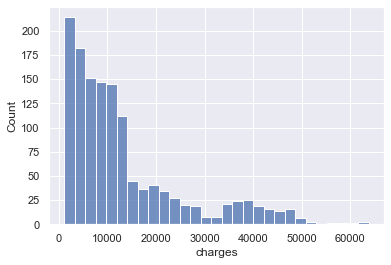

In [66]:
sns.histplot(AIC.charges);

Again, this is the best of the three graphs.  It shows that the data are positively skewed. Since most of the data are on the right, with a few smaller values showing up on the left side of the histogram, the data are skewed to the right. When data are skewed right, the mean is larger than the median. We already checked the mean and the median above, so it will be easy to compare the two with the following code:

In [67]:
a = AIC['charges'].mean() # this code is a logical statement that will only print a message based on the size of the mean relative to the size of the median
b = AIC['charges'].median()

if a > b: 
    print('The mean is larger than the median, therefore there is positive skewness')
    print(a, '>', b)
elif a < b:
    print('The mean is smaller than the median, therefore there is negative skewness')
    print(a, '<', b)
elif a == b:
    print('The mean is equal to the median, therefore there is no skewness')
    print(a, '=', b)

The mean is larger than the median, therefore there is positive skewness
13279.121486655948 > 9386.1613


C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


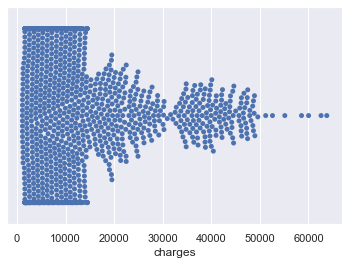

In [68]:
sns.swarmplot(data = AIC, x='charges'); #This graph will give us a nice visual of how the data is dispersed

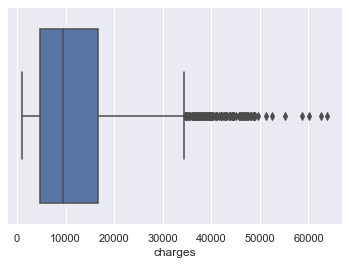

In [69]:
sns.boxplot(data = AIC, x ='charges',); #This graph visualizes the 4 quadriles and shows any outliers

### Bivariate Analysis

In [70]:
AIC.info() #this is a quick refresher to check what type of data each variable is. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**Numerical vs Numerical**

First, we can compare all the numerical variables against one another using traditional numerical vs numerical visuals such as: Scatterplot, Line plot and Joint plot. The numerical variables are: age, bmi, children and charges. This will help us understand if there are any relationships between the data, ie. older people make more claims than younger people. 

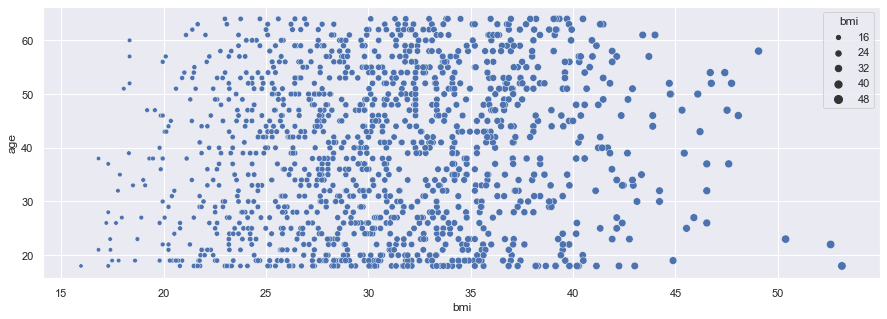

In [71]:
# Age vs BMI

figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x='bmi',y='age', data=AIC, size = "bmi") # scatter plot is a good choice for this data because bmi is continuous

The above visual really does not give us much insight. It is hard to discern any trend or pattern.  We can use a regression plot to attempt to see a pattern...

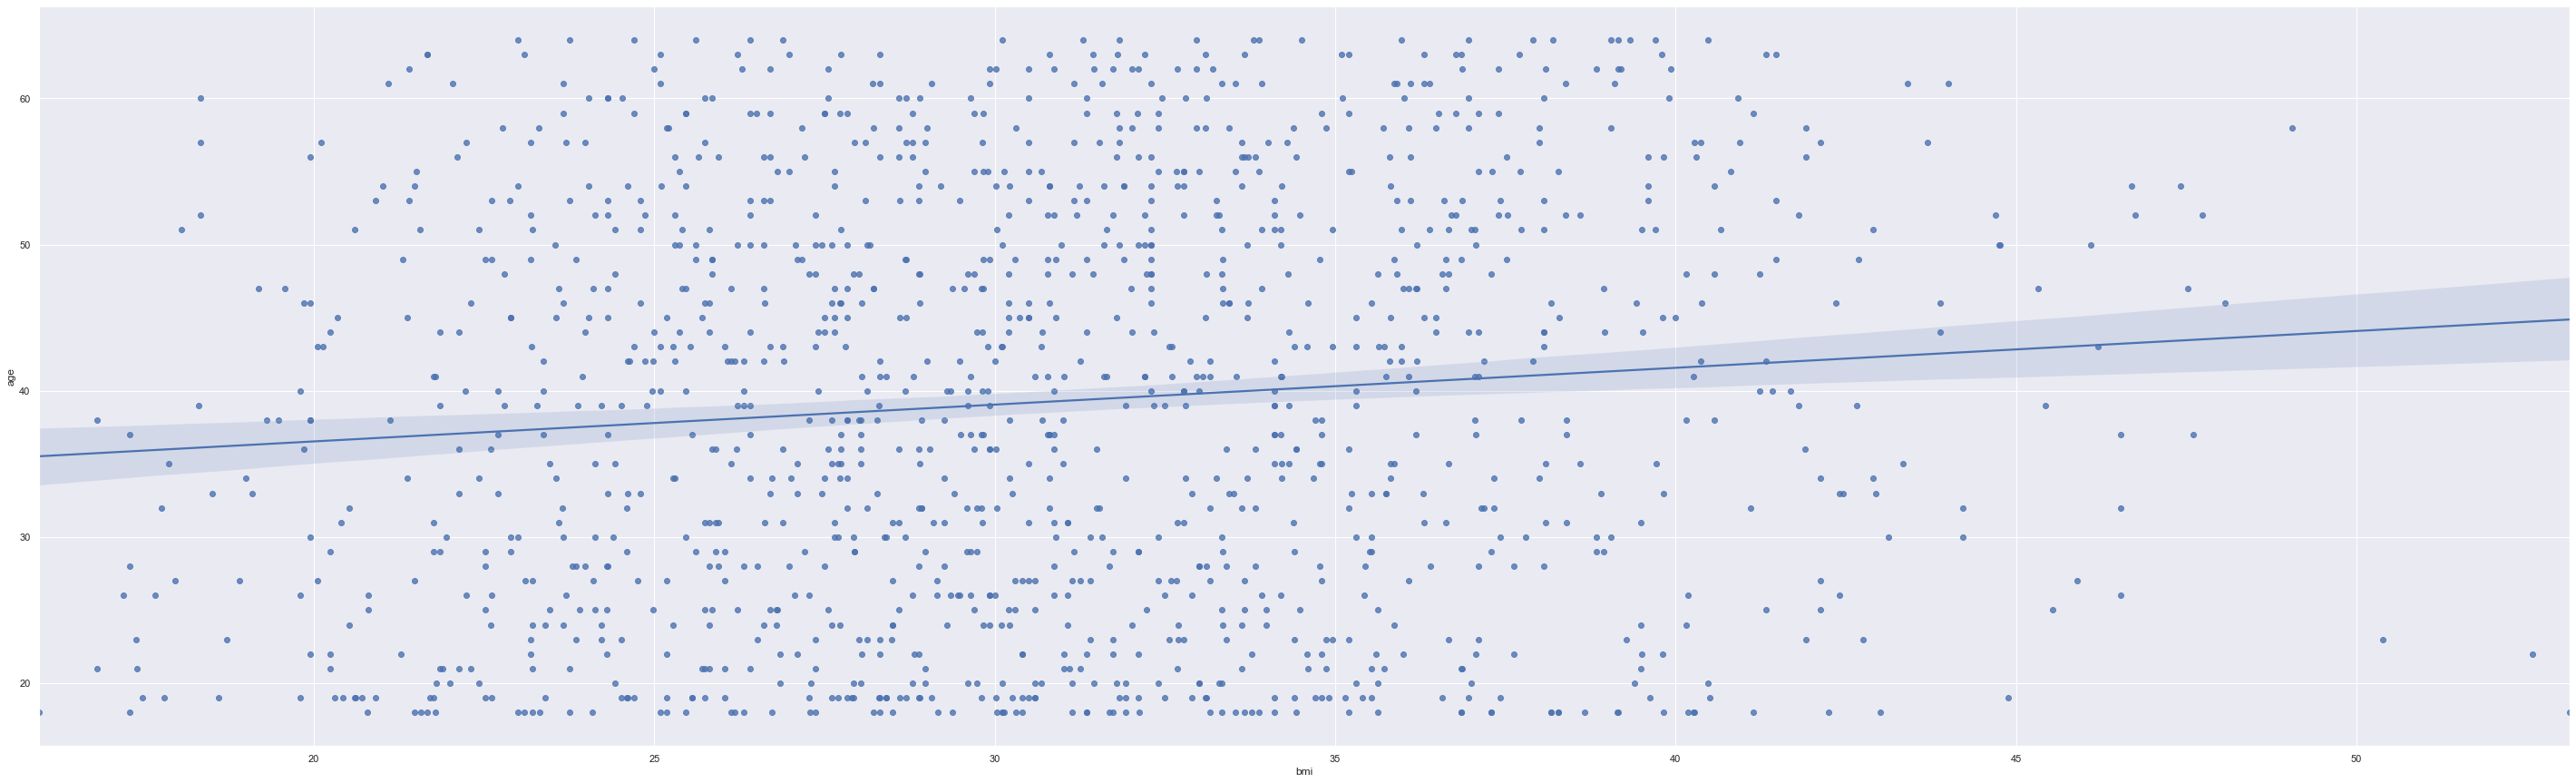

In [72]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='bmi',y='age', data=AIC ) # regression plot - scatter plot with a regression line

At this stage in our analsis, there appears to be no pattern.  However, we can dive deeper when we conduct multivariate analysis, and examine correlations between the variables using heatmaps.

In [73]:
#Age vs Children

<AxesSubplot:xlabel='age', ylabel='children'>

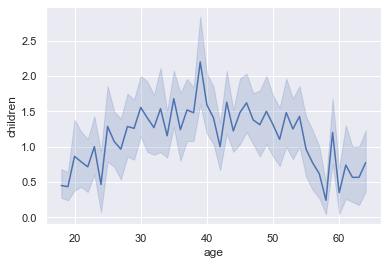

In [74]:
sns.lineplot(x='age',y='children', data=AIC ) #Using a line plot can make sense because the ages are discrete values (whole numbers from 0-5)

The above graph shows that people around 40 tend to have more children than people around 20 or 60.  We can see if age and children are correlated when we do multivariate analysis and use heatmaps for correlation.

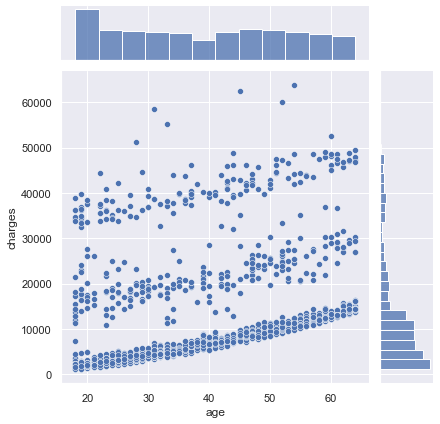

In [75]:
# Age vs Charges

sns.jointplot(data = AIC, x = 'age', y = 'charges'); #joint plot is good for charges because it is continuous data

We can see from the joint plot that there seems to be three distinct patterns.  People seem to make claims that tend to be either low, medium or high. Perhaps Axis Insurance has three distinct packages that customers can select, or perhaps payouts of claims fall in three distinct ranges, depending on what the claim may be. 

<AxesSubplot:xlabel='bmi', ylabel='children'>

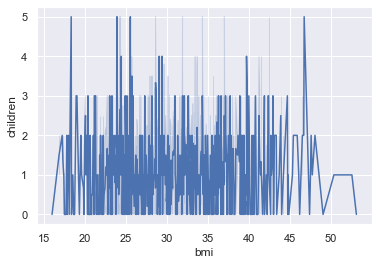

In [76]:
#BMI vs Children

sns.lineplot(x='bmi',y='children', data=AIC ) #Again, using a line plot can make sense because children are discrete values 

The line graph does not appear to be help afterall.  It is difficult to read. If other visualizations aren't helpful, we will test for correlation between the two variables under Multivariate Analysis. 

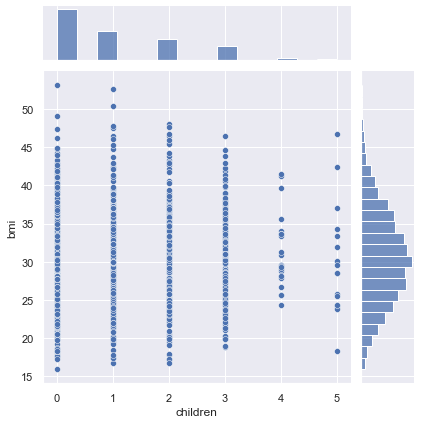

In [77]:
sns.jointplot(data = AIC, x = 'children', y = 'bmi'); #joint plot is good for charges because it is continuous data

This graph does show that there are more frequencies of 0,1,2 and 3 children, but we already knew that from univariate analysis. The points do not seem to be clustered around any one bmi point so it looks like an even spread of bmis regardless of children (ie they are not correlated) but we will test further under Multivariate Analysis

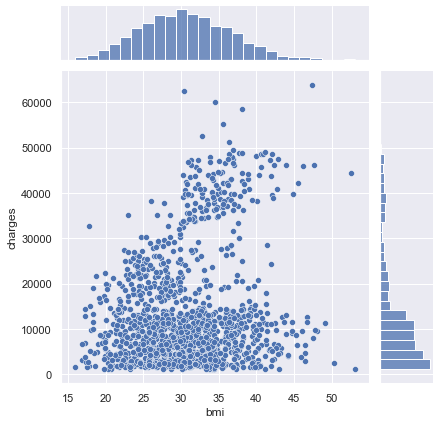

In [78]:
#BMI vs Charges
sns.jointplot(data = AIC, x = 'bmi', y = 'charges'); #joint plot might be helpful since both are continuous and a trend may be visible

Although it is difficult to see in the above graph, there MAY be two patterns emerging: There may be a trendline from 0,0 through 40,50000 and a second, flatter trendline from 0,0 through 50,10000. It could also be true that there is a cluster near the  middle of the graph (30,30000; 30,50000; 45,30000; 45,50000) and a second, bigger cluster at the bottom, left of the graph. 

<AxesSubplot:xlabel='children', ylabel='charges'>

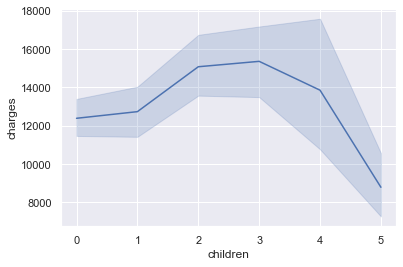

In [79]:
#Children vs Charges

sns.lineplot(x='children',y='charges', data=AIC ) #Again, using a line plot can make sense because the children are discrete values 

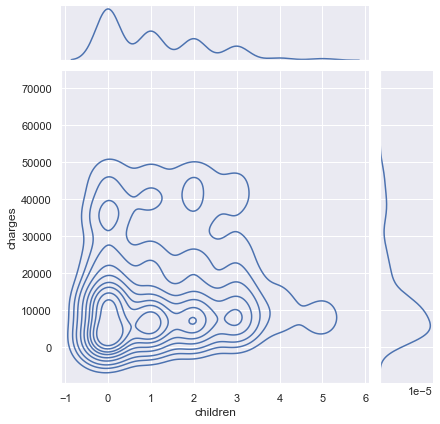

In [80]:
sns.jointplot(data = AIC, x= 'children', y = 'charges', kind="kde");

The above two graphs seem to suggest that fewer children (0,1) or a lot of children (5) correlates to lower charges, while having 2, 3 or 4 children correlates to higher charges.  We shall investigate this notion with a correlation heatplot later. 

In [81]:
AIC.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Numerical vs Categorical**

In [82]:
AIC.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
# Age vs Smokers

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


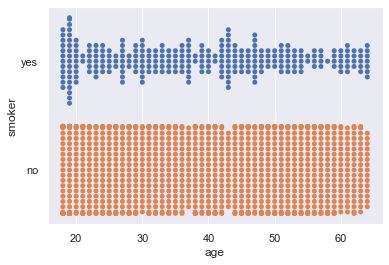

In [84]:
ax = sns.swarmplot(x="age", y="smoker", data=AIC) # this will give us a visual of the data, and will let us see if the two groups appear similar or not

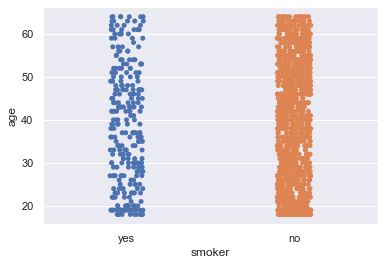

In [85]:
# stripplot of age vs smoker to include more datapoints

sns.stripplot(data = AIC, x = 'smoker', y = 'age'); # this will graph sex vs charges

In [86]:
# BMI vs Smoker

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


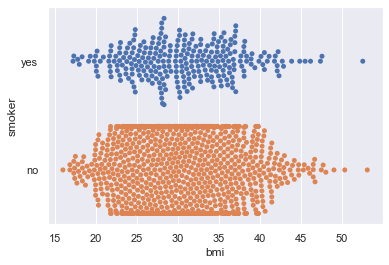

In [87]:
ax = sns.swarmplot(x="bmi", y="smoker", data=AIC) # this will give us a visual of the data, and will let us see if the two groups appear similar or not

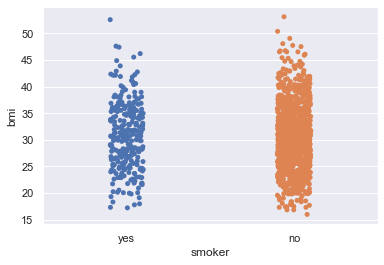

In [88]:
# stripplot of charges vs sex to include more datapoints

sns.stripplot(data = AIC, x = 'smoker', y = 'bmi'); # this will graph smoker vs bmi

In [89]:
# Charges vs Sex

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


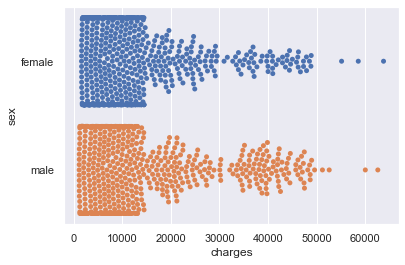

In [90]:
ax = sns.swarmplot(x="charges", y="sex", data=AIC) # this will give us a visual of the data, and will let us see if the two groups appear similar or not

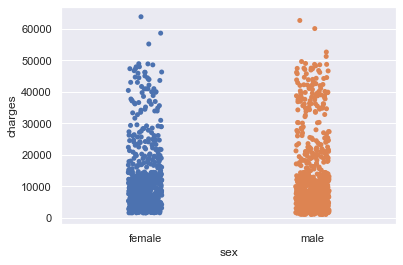

In [91]:
# stripplot of charges vs sex to include more datapoints

sns.stripplot(data = AIC, x = 'sex', y = 'charges'); # this will graph sex vs charges

**Categorical vs Categorical**

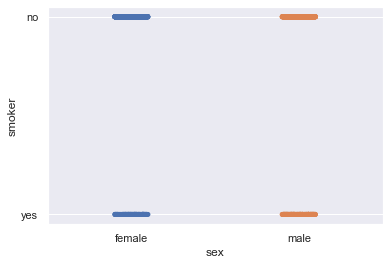

In [92]:
#Sex vs Smoker

sns.stripplot(data = AIC, x = 'sex', y = 'smoker'); # this will graph sex vs smokers


The prroblem with the above graph is that both variables are categorical and only take on 2 values each (smoker = yes/no; sex =male/female). While python is able to graph this, it makes very little sense to the viewer.  An alternative, is to use the countplot on a single variable, as we did in univariate analysis, but then use the 'hue=' command to break the variable into groups that correspond with the second categorical value.  For example, using a countplot for sex with hue=smoker, should create a bargraph with four columns: smoker+male, smoker+female, non-smoker+male, non-smoker+female.  We can then see if the different bars are similar in size or not. If they are similar in size, it means no correlation. However, if female+smoker is much larger than female+nonsmoker, for example, it would indicate that there is a correlation between females and smoking. 

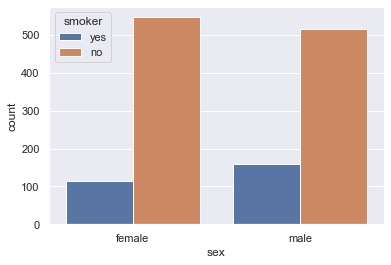

In [93]:
sns.countplot(data = AIC, x = 'sex', hue = 'smoker'); #should give a visual frequency graph of the four groups mentioned above

The above graph suggests males are slightly more likely to smoke than females.  We shall test this theory below using correlation heat maps in Multivariate Analysis. 

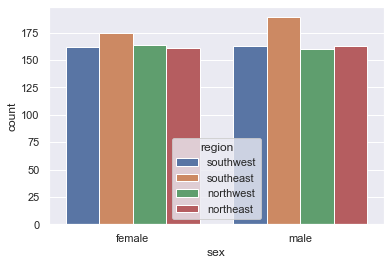

In [94]:
#Sex vs Region

sns.countplot(data = AIC, x = 'sex', hue = 'region'); #should give a visual frequency graph of male vs female broken down by the four regions

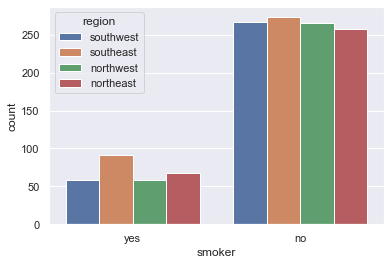

In [95]:
#Smoker vs Region
sns.countplot(data = AIC, x = 'smoker', hue = 'region'); #should give a visual frequency graph of smoker vs nonsmoker broken down by the four regions

This graph is a little difficult to interpret because, although it at first appears there are more smokers in the southeast, there are also more non-smokers in the southeast.  In other words, there are more people in the southeast than any other region. We cannot tell if the ratios of smokers in the southeast is different from the ratios of smokers in other regions. We will have to explore this more with Multivariate Analysis

### Multivariate Analysis

Multivariate analysis helps us understand how the different variables are correlated (or not) to one another.  In other words, how if the value of one changes, it affects the values of another variable. Bivariate Analysis has already given us some ideas of variables which may be related, such as smoking and charges.  We can investigate further by using the .corr fuction and printing a table of all the numerical value variables and how they are correlated.  Following this, we can make a visual using the heatmat feature in python.

In [96]:
AIC.corr() # creates a table of how the numerical values are correlated

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

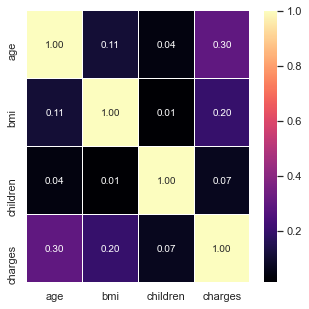

In [97]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(AIC.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show

Normally, we would set a definition of correlation equal to something along the lines of 0 to 0.1 is no correlation, 0.1 to 0.3 is weakly correlated, 0.3 to 0.6 is moderate correlation, 0.6 to <1.0 is strong correlation and 1 is perfect correlation.  Conversely, negative correlation would range from 0 to -1.0, but in this study, there is no negative correlation, so it can be ignored. The above chart shows that the is moderate correlation present is between age and charges and bmi and charges. It also shows a weak correlation between age and bmi. 

However, this function only works on numerical values.  In order to see if there is correlation between the above numerical variables and categorical variables, such as sex, smoker or region, we need to convert the categorical data to numerical data and rerun the correlation analysis.

In [98]:
Numerical = AIC.copy() # This creates a copy of the original dataframe so we can convert the objects to integers

In [99]:
Numerical['sex'] = Numerical['sex'].map({'male': 0, 'female': 1
                                        })

#Changes the categorical sex variables to binary: 0 = no, 1 = yes

In [100]:
Numerical['smoker'] = Numerical['smoker'].map({'no': 0, 'yes': 1
                                        })

#Changes the categorical smoker variables to binary: 0 = no, 1 = yes

In [101]:
Numerical['region'] = Numerical['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3 
                                        })

#Changes the categorical region variables to integers: 0 = northeast, 1 = northwest, 2 = southeast, 3 = southwest

In [102]:
Numerical.head() #check to see how the data changed. 

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [103]:
Numerical.corr() # creates a table of how the numerical values are correlated

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.004936,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,-0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

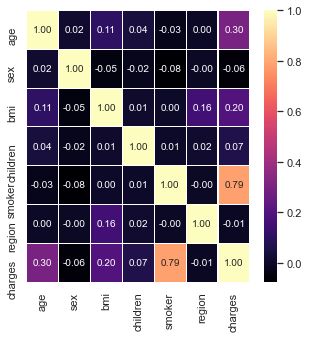

In [104]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Numerical.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show

We also suspected earlier that there was a correlation between charges and smoker. The above heatmap shows the strong correlation of 0.79. To highlight the difference between charges made by smokers and non-smokers visually, lets use a pointplot below. Point plots encode the value differences using the height of the axis, so differences beween the bmis of smokers and non-smokers should be clearly visible with a large gap between the two lines (on the y axis). We will separate by sex. 

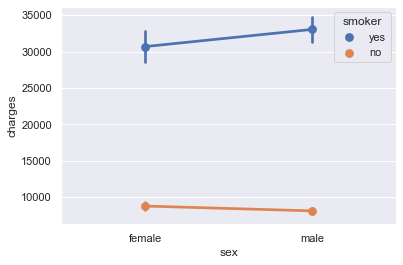

In [105]:
sns.pointplot(data = AIC,x='sex',y= 'charges', hue='smoker'); 

The chart above shows a big gap between smokers and non-smokers, as expected. The slight negative slope of the orange line suggests non-smokers are slightly less likely to be male. Or, put another way, non-smokers are slightly more likely to be female. The positive slope of the blue suggests smokers are slightly more likely to be male. 

We have now identified several variables of particular interest.  We know there are moderate correlations between age and charges and age and bmi. So lets investigate these three variables against categorical variables. 

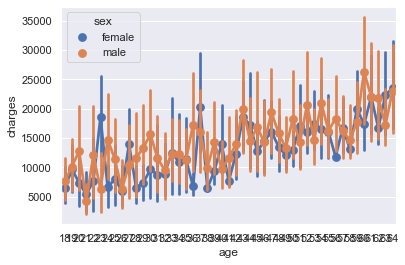

In [106]:
#Age vs Charges coloured by sex
sns.pointplot(data = AIC,x='age',y= 'charges', hue='sex'); 

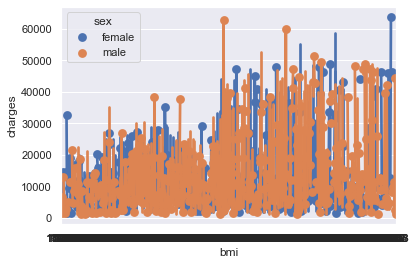

In [107]:
#BMI vs Charges coloured by sex
sns.pointplot(data = AIC,x='bmi',y= 'charges', hue='sex'); 

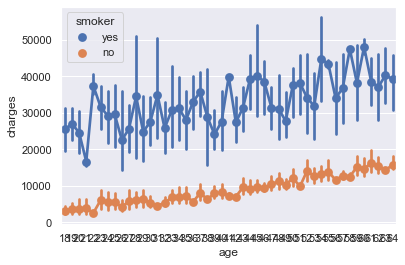

In [108]:
#Age vs Charges coloured by smoker
sns.pointplot(data = AIC,x='age',y= 'charges', hue='smoker'); 

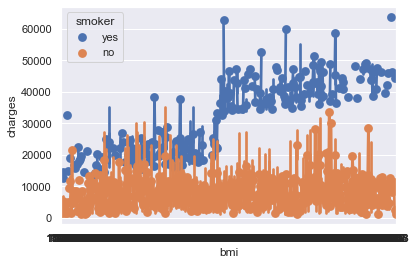

In [109]:
#BMI vs Charges  coloured by smoker
sns.pointplot(data = AIC,x='bmi',y= 'charges', hue='smoker'); 

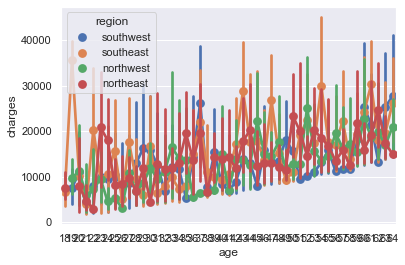

In [110]:
#Age vs Charges coloured by region
sns.pointplot(data = AIC,x='age',y= 'charges', hue='region'); 

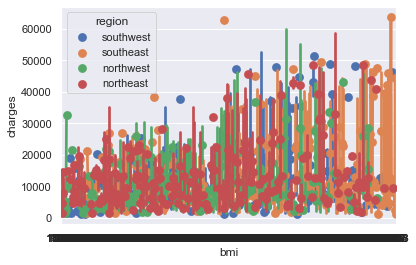

In [111]:
#BMI vs Charges coloured by region
sns.pointplot(data = AIC,x='bmi',y= 'charges', hue='region'); 

Of the above six graphs, only the middle two (Age vs Charges coloured by Smoker & BMI vs Charges coloured by Smoker) show a clear separation of the colours. In the third graph, it shows that smokers make higher claims AND they claims slightly increase as they age.  Non-smokers make lower claims, but the claims still go up slightly as non-smokers age.  In graph four, non-smokers charges remain relatively flat, even as bmi increases.  For smokers, however, claims are higher, overall, but there is a big jump in claims once bmi is over a certain number (there are too many data points to discern where the break occurs, but, because it happens near the middle of the graph, we can estimate that it occurs near the middle of the range of bmi, which we know to be 37.7. With a min. of 15.96, the jump should occur around [(37.7/2)+15.96] = 33.85 

We can examine each numerical variable against each categorical variable separately but using the same command by using multi-panel categorical plots such as the one below:

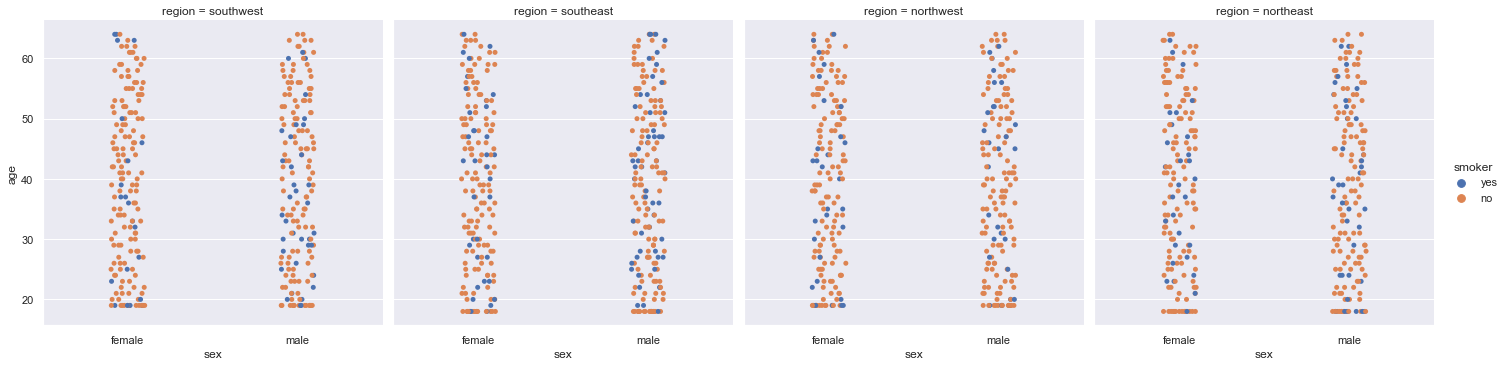

In [112]:
sns.catplot(x="sex",
               y = "age",
               hue="smoker", 
               col="region", 
               data=AIC, 
               kind="strip");

There does not appear to be much correlation between age and any of the categorical values from these graphs. We can see the regions are of similar size, there are many more non-smokers than smokers in all the regions, and smokers occur with about the same frequency regardless of age. 

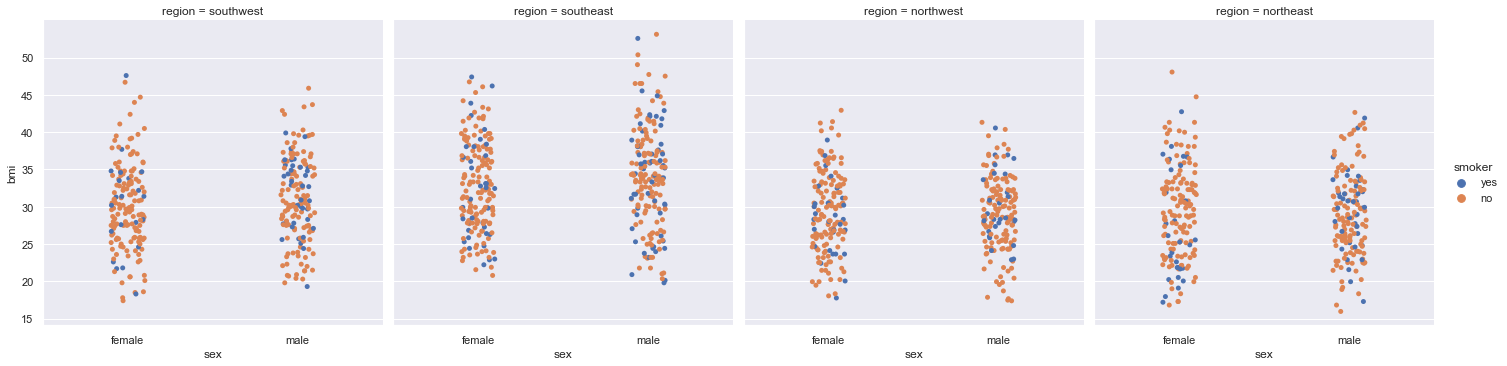

In [113]:
sns.catplot(x="sex",
               y = "bmi",
               hue="smoker", 
               col="region", 
               data=AIC, 
               kind="strip");

Again, there does not seem to be strong correlation between bmi and any of the categorical variables.  One noticable attribute, however, is it appears that extreme bmis (45+) are not as common in the north, especially the northwest, and are most prelevant in the southeast. 

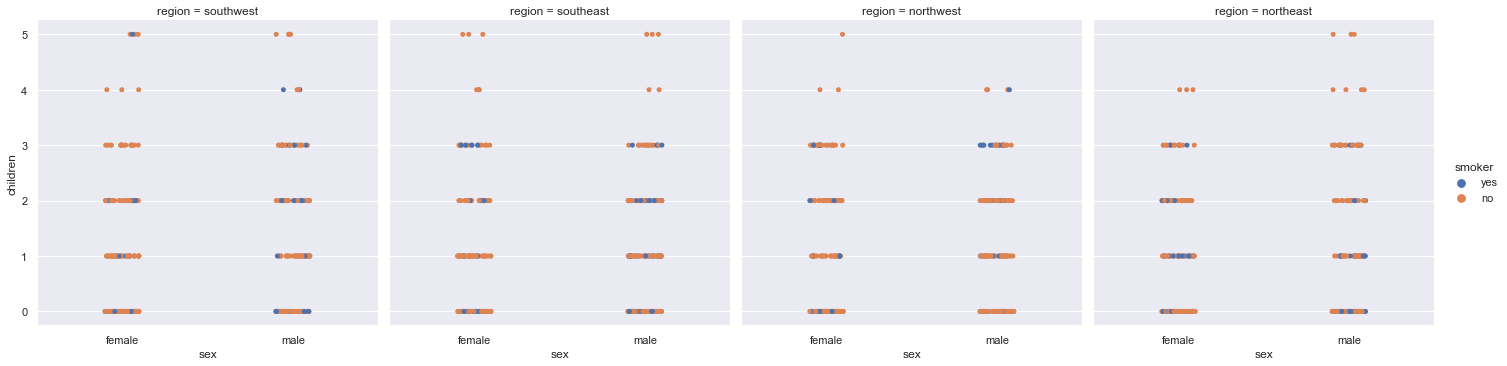

In [114]:
sns.catplot(x="sex",
               y = "children",
               hue="smoker", 
               col="region", 
               data=AIC, 
               kind="strip");

This plot is difficult to read, however, there might be a correlation between smoking and children. At first glance, it appears that individuals with 4 or 5 children are less likely to smoke, but further analysis is needed. 

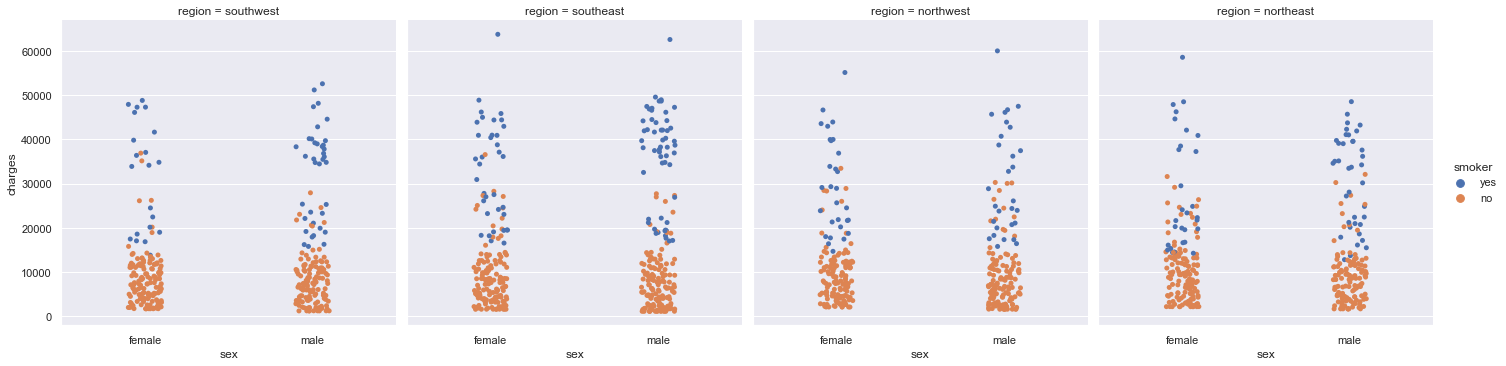

In [115]:
sns.catplot(x="sex",
               y = "charges",
               hue="smoker", 
               col="region", 
               data=AIC, 
               kind="strip");

This graph is perhaps the most useful. It is pretty clear that non-smokers, regardless of region, occupy the lower portion of the graphs. In other words, non-smokers are GENERALLY, making smaller claims, with the majority under 20,000 dollars.  Smokers, however, occupy the top part of the graph, and appear to make most of the claims of greater than 20,000 dollars.  This is really important information for an insurance company when setting premiums to ensure that non-smokers are not compensating for the claims of smokers. 

**Note:**

While we have concluded the generalized Exploratory Data Analysis (EDA), when addressing individual Investigative Questions posed by Axis Insurance, additional EDA may be required. It makes more sense to include specific analysis within section that deals with the question at hand, rather than referencing outputs in the EDA section. Therefore, additional EDA may be present in each of the Investigation Questions below...

# Part 3: Business Statistics

The management team at Axis Insurance has tasked us with helping them to answer four (4) pressing questions relating to their business.  The four (4) Investigation Question are:

***Investigation 1: "Medical claims made by the people who smoke are greater than those who don't..."***

***Investigation 2: "The BMIs of females is different than that of males..."***

***Investigation 3: "Is the Proportion of Smokers Different Across Different Regions?"***

***Investigation 4: "Is the mean of BMI of women with no children, one child and two children the same?"***

We will attempt to address each question by designing a unique study around each and applying appropriate statistical tests on the data. Our goal is to provide answers to these questions at a certain level of statistical certainty. 

## Investigation 1: "Medical claims made by the people who smoke is greater than those who don't..."

Before we examine the data, we need to set up a Null Hypothesis and Althernate Hypothesis based on the question we are attempting to investigate. The assumption that, "Medical clamis made by thet people who smoke is greater than those who dont..." is an assumption beyond what we already know.  The Insurance company assumes SMOKERS make MORE claims than NON-SMOKERS. This assumption will form our Alternate Hypothesis: People who smoke make greater claims than people who do not smoke. 

**Stating the Hypotheses:**

Ho: Mean of Smokers' Charges = Mean of Non-Smokers' Charges, ie. there is no difference between the means
Ha: Mean of Smokers' Charges > Mean of Non-Smokers' Charges

## Targeted Exploratory Data Analysis

### Are the Charges Data Normally Distributed?

Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

If p-value is > 0.05, then the data is normally distributed

In [116]:
shapiro_test = stats.shapiro(AIC['charges'])
shapiro_test

ShapiroResult(statistic=0.8147611021995544, pvalue=1.1960358168550093e-36)

The shapiro test reveals that the data is not normally distributed because p is << 0.05.  We can use visualizations to get a better idea of how it looks. 

### Visualizing the Data

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

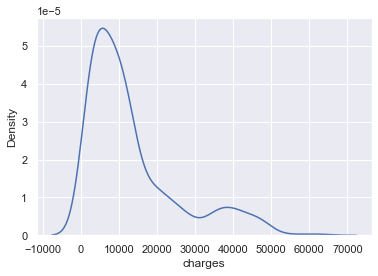

In [117]:
sns.distplot(AIC['charges'], hist=False) # adding an argument to plot only frequency polygon

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

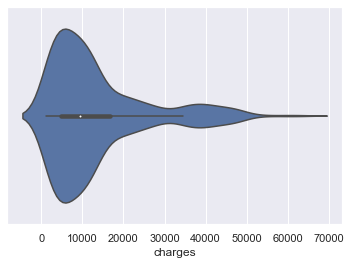

In [118]:
sns.violinplot(AIC['charges']) # plots a violin plt using the seaborn package.

### Comparing Smokers and Non-Smokers

In [119]:
#Frequencies of Smokers vs Non-Smokers

counterS = 0 #this code will allow us to see how many smokers there are in the sample
counterNS = 0 #this code will allow us to see how many non-smokers there are in the sample

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['smoker'].loc[index] == 'yes':
        counterS = counterS + 1
    elif AIC['smoker'].loc[index] == 'no':
        counterNS = counterNS + 1

print('There are', counterS, 'smokers' )
print('There are', counterNS, 'non-smokers')
print('')
print('For a total of', counterS+counterNS, 'individuals') #must equal 1337


There are 274 smokers
There are 1063 non-smokers

For a total of 1337 individuals


Knowing the sample sizes are not equal is extremely helpful because it rules out paired-tests. The samples are therefore not dependent. 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


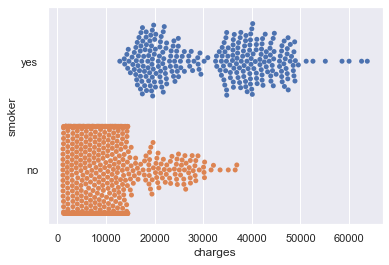

In [120]:
ax = sns.swarmplot(x="charges", y="smoker", data=AIC) # this will give us a visual of the data, and will let us see if the two groups appear similar or not

One way to compare if the two groups are different is to create two separate dataframes, one with only smokers, the other only non-smokers...

**Smokers**

In [121]:
Smokers = AIC.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [122]:
for index in range(0,len(Smokers)): # The for loop will increase the ID value for each recor  
    if Smokers['smoker'].loc[index] == 'no':
        Smokers.drop([index], axis=0, inplace=True) 
    
# Slightly counter-intuitive, but if the loop recognizes that Smoker = no, it will delete the row. This leaves only rows with Smoker = yes


In [123]:
Smokers.head() #check to see the new dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [124]:
Smokers.shape # this will describe the dataframe, must = 274 as seen above

(274, 7)

In [125]:
Smokers.describe() # this will allow us to compare the mean with what we calculated above using the loop (mean = 32050.23)

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


**Non-Smokers**

In [126]:
NSmokers = AIC.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [127]:
for index in range(0,len(NSmokers)): # The for loop will increase the ID value for each recor  
    if NSmokers['smoker'].loc[index] == 'yes':
        NSmokers.drop([index], axis=0, inplace=True) 
    
# If the loop recognizes that Smoker = yes, it will delete the row. This leaves only rows with Smoker = no


In [128]:
NSmokers.head() #check to see the new dataframe

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [129]:
NSmokers.shape # this will describe the dataframe, must = 1063 as seen above

(1063, 7)

In [130]:
NSmokers.describe() # this will allow us to compare the mean with what we calculated above using the loop (mean = 8440.66)

,age,bmi,children,charges
count,1063.000000,1063.000000,1063.000000,1063.000000
mean,39.404516,30.651853,1.091251,8440.660307
std,14.076133,6.045956,1.218250,5992.973800
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,3988.883500
50%,40.000000,30.305000,1.000000,7345.726600
75%,52.000000,34.430000,2.000000,11363.019100
max,64.000000,53.130000,5.000000,36910.608030


## Statistical Analysis

### Testing the Means

We can quickly test the mean of the entire population and compare them to the means ofjust smokers and just non-smokers to see if there is a noticeable difference. 

In [131]:
AIC['charges'].mean() #This will show us the mean of chargers for ALL individuals (smokers + non-smokers)

13279.121486655948

In [132]:
meanS = 0 # this, coupled with the loop will allow us to add the chargers of ONLY smokers
meanNS = 0 # this, coupled with the loop will allow us to add the chargers of ONLY non-smokers

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['smoker'].loc[index] == 'yes':
        meanS = meanS + AIC['charges'].loc[index]
    elif AIC['smoker'].loc[index] == 'no':
        meanNS = meanNS + AIC['charges'].loc[index]

print('The mean of smokers charges is', meanS/counterS) #taking the total sum of charges for smokers and dividing by the number of smokers from above will give us the MEAN of smokers charges
print('The mean of non-smokers charges is', meanNS/counterNS) #taking the total sum of charges for non smokers and dividing by the number of non smokers from above will give us the MEAN of non smokers charges


The mean of smokers charges is 32050.23183153285
The mean of non-smokers charges is 8440.660306508935


Visually, the means of the two groups appear to be quite different, but we will have to run statistical analysis on the means to see if they are actually different at the 95% confidence level.  Before we do this, however, lets check to see if the two groups follow a normal distribution pattern...

In [133]:
#Checking for normal distribution: Smokers Group

shapiro_test = stats.shapiro(Smokers['charges'])
shapiro_test

ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)

With a very small p-value (2.625x10e-09 << 0.05), it is safe to conclude the smoker data is not normally distributed.  We can graph the data to see... 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

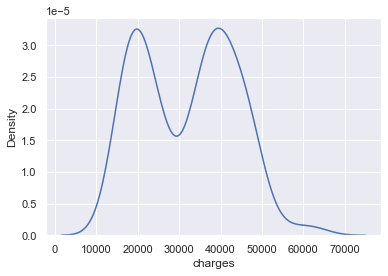

In [134]:
sns.distplot(Smokers['charges'], hist=False) # graphing the distribution of smokers

In [135]:
#Checking for normal distribution: Non-Smokers Group

In [136]:
shapiro_test = stats.shapiro(NSmokers['charges'])
shapiro_test

ShapiroResult(statistic=0.8729138374328613, pvalue=1.503623581761669e-28)

With a very small p-value (1.504x10e-28 << 0.05), it is safe to conclude the smoker data is not normally distributed.  We can graph the data to see... 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

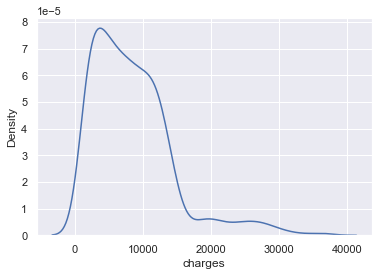

In [137]:
sns.distplot(NSmokers['charges'], hist=False) # graphing the distribution of non-smokers

Now that we know the variables are not normally distributed, we can also check to see if their variances are equal... 

In [138]:
#The following code will conduct a levene test on the two variances. if p >= 0.05, we can conclude the variances are equal

from scipy.stats import levene # checkingfor equal variance
# sample for smokers
x1 = Smokers['charges']

# sample for non-smokers
x2 = NSmokers['charges']

stat, p = levene(x1, x2)
p

1.670117565125241e-66

The small p-value (1.67x10e-66 << 0.05) suggests that the populations do not have equal variances.

In [139]:
#The following code will print the variances of the two groups 
[np.var(x, ddof=1) for x in [x1, x2]]


[133207311.20634921, 35915734.96876324]

The sample variance of smokers is much larger than that of non-smokers: 133,207,311.2 vs 35,915,735.0, respectively.

In [140]:
# To check the descrepency of size... however, the above output created a list, must be changed to float (integer works too, since we dont require precision here)

var1 = [np.var(x, ddof=1) for x in [x1]]
var2 = [np.var(x, ddof=1) for x in [x2]]

for i in range(0, len(var1)):
    var1 = float(var1[i])
    
for i in range(0, len(var2)):
    var2 = float(var2[i])

print(var1/var2)


3.708884457528232


### Independent (unpaired) two-sample t-test.

The charges from smokers (N<sub>1</sub>=274) and the charges from non-smokers (N<sub>2</sub>=1063) are now recorded in two different dataframes: Smokers and NSmokers, respectively. Are the charges for smokers higher than charges for non-smokers? The sample sizes are not equal.

### Step 1: Restate the null and alternative hypothesis from above

* $H_0$: $x̄_1$ = $x̄_2$ OR $x̄_1$ - $x̄_2$ = 0, There is no difference between the means
* $H_A$: $x̄_1$ > $x̄_2$

Where: 
    $x̄_1$ = mean of the chargers from smokers
    $x̄_2$ = mean of the chargers from non-smokers

### Step 2: Decide the significance level

Here we select α = 0.05, which is equivalent to 95% confidence

### Step 3: Identify the test statistic

* We have two samples of numerical data: charges from smokers and charges from non-smokers
* The population standard deviation is not known, so we must us a T-distribution and the Tstat test statistic 
* Neither sample is normally distributed, but both are sufficiently large (n > 30) that we can still use the T-distribution
* Management is only interested in knowing if claims made by smokers is GREATER than claims made my non-smokers; therefore we can conduct a one-tailed test$^1$
* The sample sizes are NOT equal, therefore we cannot use a paired-test, or a Wilcoxon test
* Variances are NOT equal
* HOWEVER, "Generally, even if one variance is up to 3 or 4 times the other, the equal variance assumption will give good results"$^2$
* One variance is 3.7 times the other, so we can use a regular Two sample t-test

**Two Sample t Test (one-tailed test):**

Let x̄ and ȳ be the sample means and $s_x$ and $s_y$ be the sample standard deviations of two sets of data of size $n_x$ and $n_y$ respectively. $n_x$ and $n_y$ are sufficiently large for the Central Limit Theorem to hold:

$$t =  \frac{(\bar{x} - \bar{y})}{\sqrt{\frac{s^2_x}{n_x}+\frac{s^2_y}{n_y}}}$$

where, degrees of freedom (df) is calculated as:

$$df =  \frac{\Big[{\frac{s^2_x}{n_x}+\frac{s^2_y}{n_y}}\Big]^2}    {\Big[\frac{s^4_x }{n_x^2(n_x - 1)}+\frac{s^4_y}{n_y^2(n_y - 1)}\Big]}$$

In our study, $n_x$ and $n_y$ are sufficiently large enough for the CLT to hold. 

$^1$ Management is only concerned whether claims made by smokers are MORE than those made by non-smokers, therefore we do not need to conduct a two-tailed test to examine both sides of the distribution. The p-value given by python will actually be p_twotailed and we must calculate the p_onetailed by setting it equal to (1/2) x (p_twotailed).

$^2$ https://www.real-statistics.com/students-t-distribution/two-sample-t-test-uequal-variances/

Source: https://www.real-statistics.com/students-t-distribution/two-sample-t-test-uequal-variances/

### Step 4: Calculate p value using T-test

In [141]:
# sample for smokers
x1 = Smokers['charges']

# sample for non-smokers
x2 = NSmokers['charges']
{}
t, p_value = stats.ttest_ind(x2, x1)
print("tstats = ",t, ", p_onetailed = ", p_value*0.5)

tstats =  -46.64479459840305 , p_onetailed =  7.033610474688249e-283


The negativity of the tstat can be ignored, since it only indicates a reverse in directionality when compared to a positive tstat. Tstats should be evaluated in absolute terms.  The absolute tstat value of 46.6 shows that the groups are, indeed, different. The larger the tstat, the more difference there is between the groups. A tstat of 46.6 means that the groups are 46.6 times as different from each other as they are within each other.

Source: https://www.statisticshowto.com/probability-and-statistics/t-test/ 

### Step 5:  Decide to reject or accept null hypothesis

Since P_onetailed (7.03e-283) << 0.05 (alpha) we reject the null hypothesis and conclude that there is a statistically significant difference between the two means at the 95% confidence level. 

## Conclusion: "Medical claims made by the people who smoke is greater than those who don't..."

We have demonstrated that the means are not equal with relative certainy. Our confidence level is set to 0.05, or 95% and the null hypothesis is rejected at this confidence level. We can accept the Alternate Hypothesis that there is a difference between the means of charges between smokers and non-smokers. Because we used a one-tailed test, we can also demonstrate with certainty that the mean charges of smokers is GREATER than the mean chargers of non-smokers. The tstat reinforces this, because we can interpret it as meaning that there is almost 47 standard deviations between the two means. 

## Investigation 2: "The BMI of females is different from that of males..."

Before we examine the data, we need to set up a Null Hypothesis and Althernate Hypothesis based on the question we are attempting to investigate. The assumption that, "The BMI of females is different from that of males..." is an assumption beyond what we already know.  The Insurance company assumes that the BMI of females is NOT equal to the BMI of males.  

**Stating the Hypotheses:**

We can set the Null Hypothesis to:
Ho: BMI Females = BMI Males

We can set the Alternate Hypothsis to:
Ha: BMI Females != BMI Males

## Targeted Exploratory Data Analysis

### Are the Charges Data Normally Distributed?

Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

If p-value is > 0.05, then the data is normally distributed

In [142]:
shapiro_test = stats.shapiro(AIC['bmi'])
shapiro_test

ShapiroResult(statistic=0.9938749074935913, pvalue=2.5726250896696e-05)

The shapiro test reveals that the data is normally distributed. because p > 0.05.  We can use visualizations to get a better idea of how it looks.

### Visualizing the Data

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

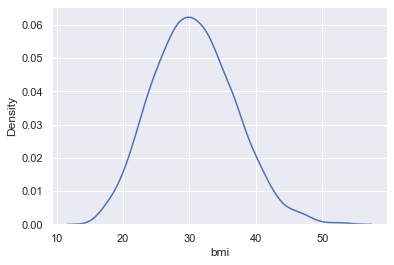

In [143]:
sns.distplot(AIC['bmi'], hist=False) # graphing the frequency

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

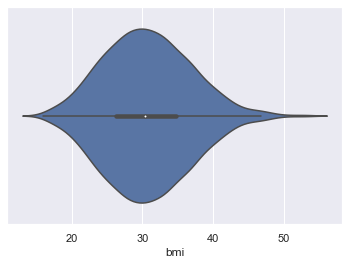

In [144]:
sns.violinplot(AIC['bmi']) # plots a violin plt using the seaborn package.

### Comparing Males and Females

In [145]:
#Frequencies of Males and Females

counterM = 0 #this code will allow us to see how many smokers there are in the sample
counterF = 0 #this code will allow us to see how many non-smokers there are in the sample

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['sex'].loc[index] == 'male':
        counterM = counterM + 1
    elif AIC['sex'].loc[index] == 'female':
        counterF = counterF + 1

print('There are', counterM, 'males' )
print('There are', counterF, 'females')
print('')
print('For a total of', counterM+counterF, 'individuals') #must equal 1337

There are 675 males
There are 662 females

For a total of 1337 individuals


C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


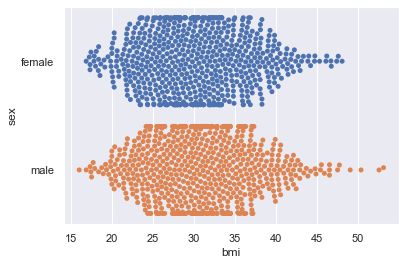

In [146]:
ax = sns.swarmplot(x="bmi", y="sex", data=AIC) # this will give us a visual of the data, and will let us see if the two groups appear similar or not

We can further investigate by separating the two groups into individual dataframes, like we did with smokers vs non-smokers: males and females. 

**Males**

In [147]:
Males = AIC.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [148]:
for index in range(0,len(Males)): # The for loop will increase the ID value for each recor  
    if Males['sex'].loc[index] == 'female':
        Males.drop([index], axis=0, inplace=True) 
    
# Slightly counter-intuitive, but if the loop recognizes that sex = female, it will delete the row. This leaves only rows with sex = male


In [149]:
Males.head() #check to see the new dataframe

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [150]:
Males.shape # this will describe the dataframe, must = 675 as seen above

(675, 7)

In [151]:
Males.describe() # this will allow us to compare the mean with what we calculated above using the loop (mean = 30.94)

,age,bmi,children,charges
count,675.000000,675.000000,675.000000,675.000000
mean,38.946667,30.943652,1.117037,13974.998864
std,14.039584,6.144973,1.219132,12971.958663
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4654.022675
50%,39.000000,30.690000,1.000000,9377.904700
75%,51.000000,35.025000,2.000000,19006.685500
max,64.000000,53.130000,5.000000,62592.873090


**Females**

In [152]:
Females = AIC.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY females

In [153]:
for index in range(0,len(Females)): # The for loop will increase the ID value for each recor  
    if Females['sex'].loc[index] == 'male':
        Females.drop([index], axis=0, inplace=True) 
    
# Slightly counter-intuitive, but if the loop recognizes that sex = male, it will delete the row. This leaves only rows with sex = female


In [154]:
Females.head() #check to see the new dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [155]:
Females.shape # this will describe the dataframe, must = 662 as seen above

(662, 7)

In [156]:
Females.describe() # this will allow us to compare the mean with what we calculated above using the loop (mean = 30.38)

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


## Statistical Analysis

### Testing the Means

We can quickly test the mean of the entire population and compare them to the means of just males and just females to see if there is a noticeable difference. 

In [157]:
AIC['bmi'].mean() #This will show us the mean of bmi for ALL individuals (male and female)

30.663451757666405

In [158]:
meanM = 0 # this, coupled with the loop will allow us to add the bmi of ONLY males
meanF = 0 # this, coupled with the loop will allow us to add the bmi of ONLY females

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['sex'].loc[index] == 'male':
        meanM = meanM + AIC['bmi'].loc[index]
    elif AIC['sex'].loc[index] == 'female':
        meanF = meanF + AIC['bmi'].loc[index]

print('The mean bmi of males is', meanM/counterM) #taking the total sum of charges for smokers and dividing by the number of smokers from above will give us the MEAN of smokers charges
print('The mean bmi of females is', meanF/counterF) #taking the total sum of charges for non smokers and dividing by the number of non smokers from above will give us the MEAN of non smokers charges


The mean bmi of males is 30.94365185185183
The mean bmi of females is 30.377749244713023


Visually, the means of the two groups appear to be quite similar, but we will have to run statistical analysis on the means to see if they are actually different at the 95% confidence level.  Before we do this, however, lets check to see if the two groups follow a normal distribution pattern...

In [159]:
#checking the bmi of males data for normal distribution

shapiro_test = stats.shapiro(Males['bmi'])
shapiro_test

ShapiroResult(statistic=0.993047297000885, pvalue=0.0031627288553863764)

With a p-value of 0.003 < 0.05, it is safe to conclude the male data is not normally distributed.  We can graph the data to see... 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

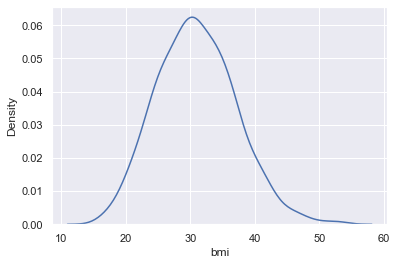

In [160]:
sns.distplot(Males['bmi'], hist=False) # graphs the distribution of males

In [161]:
#checking the bmi of females data for normal distribution

shapiro_test = stats.shapiro(Females['bmi'])
shapiro_test

ShapiroResult(statistic=0.9930257797241211, pvalue=0.0035433683078736067)

With a p-value of 0.003 < 0.05, it is safe to conclude the male data is not normally distributed.  We can graph the data to see... 

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

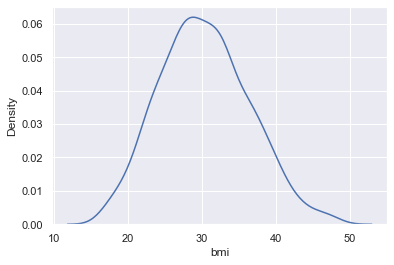

In [162]:
sns.distplot(Females['bmi'], hist=False) # adding an argument to plot only frequency polygon

Now that we know the variables are not normally distributed, we can also check to see if their variances are equal... 

In [163]:
#The following code will conduct a levene test on the two variances. if p >= 0.05, we can conclude the variances are equal

# sample for males
m1 = Males['bmi']

# sample for females
f2 = Females['bmi']

stat, p = levene(m1, f2)
p

0.9216570820140155

The large p-value (p > 0.05) suggests that the populations do have equal variances

In [164]:
[np.var(x, ddof=1) for x in [m1, f2]]

[37.76069402549732, 36.554395153365576]

This is not surprising, given that the sample variance of males and females is almost equal: 37.76 and 36.55, respectively. 

### Independent (unpaired) two-sample t-test.

The bmi of N<sub>1</sub>=675 males and the bmi of N<sub>2</sub>=662 females are now recorded in two different dataframes: Males and Females, respectively. Are the bmis for women different from men? The sample sizes are not equal, but the variances are approximately equal. 

### Step 1: Restate the null and alternate hypothesis from above

* Ho: $x̄_1$ = $x̄_2$ OR $x̄_1$ - $x̄_2$ = 0, There is no difference between the means
* Ha: $x̄_1$ != $x̄_2$ OR $x̄_1$ - $x̄_2$ != 0, There is difference between the means

Here, $x̄_1$ = the mean BMI for females, $x̄_2$ = the mean BMI of males

### Step 2: Decide the significance level

Here we select α = 0.05, which is equivalent to 95% confidence

### Step 3: Identify the test statistic

* We have two samples of numerical data: BMIs from males and BMIs from females
* The population standard deviation is not known, so we must us a T-distribution and the Tstat test statistic 
* Neither sample is normally distributed, but both are sufficiently large (n > 30) that we can still use the T-distribution
* Variances are close enough that we can assume equality
* Management is interested in knowing if the BMI of females is different than the BMI of males, ie. they want to know if it is less than OR greater than the BMI of males. Therefore, we must conduct a two-tailed test
* The samples are similar in size but are NOT equal, therefore we cannot use a paired-test, or a Wilcoxon test

**Two Sample t Test (two-tailed test):**

Let x̄ and ȳ be the sample means and $s_x$ and $s_y$ be the sample standard deviations of two sets of data of size $n_x$ and $n_y$ respectively. $n_x$ and $n_y$ are sufficiently large for the Central Limit Theorem to hold, then the random variable

$$t =  \frac{(\bar{x} - \bar{y})}{s\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$

has distribution T($n_x$ + $n_y$ – 2), where:

$$s^2 =  \frac{{(n_x-1)s_x^2} + {(n_y-1)s_y^2} }{{(n_x-1)}+{(n_y-1)}}$$

s, as defined above, can be viewed as a way to pool $s_x$ and $s_y$, and so $s^2$ is referred to as the pooled variance. Also, note that the degrees of freedom of t is the value of the denominator of $s^2$.

Source: https://www.real-statistics.com/students-t-distribution/two-sample-t-test-equal-variances/

### Step 4: Calculate p value using T-test

In [165]:
# sample for males
bmi1 = Males['bmi']

# sample for females
bmi2 = Females['bmi']

t, p_value = stats.ttest_ind(bmi2, bmi1)
print("tstats = ",t, ", p_value = ", p_value)

tstats =  -1.6970672301298684 , p_value =  0.08991704324931137


Again, the negativity of the tstat can be ignored. Running the test backwards will give a positive tstat (See proof below). The absolute tstat value of 1.697 shows that the groups are very similar. The smaller the tstat, the more similarity there is between groups. A tstat of 1.697 means that the groups are only 1.697 times as different from each other as they are within each other.

Source: https://www.statisticshowto.com/probability-and-statistics/t-test/

In [166]:
#Proof of directionality of a negative t-stat
#switching the place of x1 and x2 within the formula should give a positive value of 1.697
t, p_value = stats.ttest_ind(bmi1, bmi2)
print("tstats = ",t, ", p_value = ", p_value)

tstats =  1.6970672301298684 , p_value =  0.08991704324931137


### Step 5:  Decide to reject or accept null hypothesis

Since p-value (0.0899) > 0.05 (alpha) we cannot reject the null hypothesis. Therefore, we conclude that there is no statistical difference between the two means at the 95% confidence level. In other words, there is no difference between the BMI of females and the BMI of males at the 95% confidence level. 

## Conclusion: "The BMI of females is different from that of males..."

Using the above approach, we have demonstrated that the means are approximately equal with relative certainty. Our confidence level is set to 0.05, or 95% and the null hypothesis cannot be rejected at this confidence level. Therefore, there is no difference between the BMI of females and the BMI of males. The small t-stat also suggests that there is less than 2 standard deviations between the mean of BMI of females and the mean of BMI for males. 

## Investigation 3: "Is the Proportion of Smokers Different Across Different Regions?"

This question is a bit perplexing. At first glance, it would appear that, since there are four regions, an equal distribution would mean that 25% of ALL smokers are present in EACH region. However, this would only be true IF all regions are equal in size. We already know from univariate analysis of the region data that this is not the case. We can approach this problem two ways: by calculating the distribution of the expected values and testing to see if the groups match this distribution (chi square goodness of fit test) or we can assume that we do not know the underlying distribution but want to test whether the groups have the same distribution (chi square test of independence). We can, therefore, attempt to answer this question in two different ways:

**Method 1:** 

i) Find the observed values of smokers for each region

ii) Calculate the expected values for each region: (total number of smokers/total customers) x total customers per region

iii) Run a Chi square goodness of fit test using the expected numbers calculated above against the observed numbers in each region

**Method 2:**

i) Create distinct dataframes for each region

ii) Create Contingency Tables showing values for the number and proportion of smokers and non-smokers in each region

iii) Perform a Chi square test of independence using a contingency table showing the frequency of smokers in each region relative to the number of total customers in that specific region


Source: https://stats.stackexchange.com/questions/110718/chi-squared-test-with-scipy-whats-the-difference-between-chi2-contingency-and

**Stating the Hypotheses:**

Before attempting either method, we must state the Null and Alternate Hypothesis before we examine the data. There is no previously stated assumption made by Axis stating that the regions are not equal or that at least one region is not equal to the others, so the Null Hypothesis would be that all regions are equal. Conversely, the Alternate Hypothesis will be that AT LEAST one region is not equal to the others. 

We can set the Null Hypothesis (Ho) and Alternate Hypothesis (Ha) to:

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ = $x̄_4$

Ha: $x̄_1$ != AT LEAST one of: $x̄_2$, $x̄_3$, $x̄_4$

where: $x̄_1$ = the ratio of smokers for the northeast region;

$x̄_2$ = the ratio of smokers for the northwest region; 

$x̄_3$ = the ratio of smokers for the southeast region;

$x̄_4$ = the ratio of smokers for the southwest region

## Targeted Exploratory Data Analysis

In this instance, we will be looking at the frequencies of categorical data. In order to get a good visualization of the data, we can convert one of the variables to numerical data and then create a graph.  We will convert the smoker variable to binary with smoker = 1 and nonsmoker = 0. Before this, however, we will create a copy of the data to preserve the original dataframe. 

In [167]:
Smoker_Group = AIC.copy() # This creates a copy of the original dataframe so we can convert the objects of sex into binary format

In [168]:
Smoker_Group['smoker'] = Smoker_Group['smoker'].map({'no': 0, 'yes': 1
                                        })

#Changes the categorical smoker variables to binary: 0 = no, 1 = yes

In [169]:
# check to see if the transformation worked...
Smoker_Group.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


We can start analyzing the data by computing the frequencies of the four regions. A loop function will accomplish this. 

In [170]:
ne = 0 # sets the count to 0, will allow us to count only people in the northeast
nw = 0 # sets the count to 0, will allow us to count only people in the northwest
se = 0 # sets the count to 0, will allow us to count only people in the southeast
sw = 0 # sets the count to 0, will allow us to count only people in the southwest

for index in range(0,len(Smoker_Group)): # The for loop will increase the ID value for each recor  
    if Smoker_Group['region'].loc[index] == 'northeast':    
        ne = ne + 1
    elif Smoker_Group['region'].loc[index] == 'northwest': 
        nw = nw + 1
    elif Smoker_Group['region'].loc[index] == 'southeast': 
        se = se + 1
    elif Smoker_Group['region'].loc[index] == 'southwest': 
        sw = sw + 1
        
total = ne+nw+se+sw
        
print('The number of people in the Northeast is', ne)
print('The number of people in the Northwest is', nw)
print('The number of people in the Southeast is', se)
print('The number of people in the Southwest is', sw)
print('')
print('The total number of people in all regions is', total) #must equal 1337

The number of people in the Northeast is 324
The number of people in the Northwest is 324
The number of people in the Southeast is 364
The number of people in the Southwest is 325

The total number of people in all regions is 1337


Next, we can calculate the frequency of smokers in each of the distinct regions with a compound loop function.

In [171]:
smokerNE = 0 # this, coupled with the loop will allow us to determine the frequency of smokers in the Northeast
smokerNW = 0 # this, coupled with the loop will allow us to determine the frequency of smokers in the Northwest
smokerSE = 0 # this, coupled with the loop will allow us to determine the frequency of smokers in the Southeast
smokerSW = 0 # this, coupled with the loop will allow us to determine the frequency of smokers in the Southwest

for index in range(0,len(Smoker_Group)): # The for loop will increase the ID value for each recor  
    if Smoker_Group['smoker'].loc[index] == 1 and Smoker_Group['region'].loc[index] == 'northeast':    
        smokerNE = smokerNE + 1
    elif Smoker_Group['smoker'].loc[index] == 1 and Smoker_Group['region'].loc[index] == 'northwest': 
        smokerNW = smokerNW + 1
    elif Smoker_Group['smoker'].loc[index] == 1 and Smoker_Group['region'].loc[index] == 'southeast': 
        smokerSE = smokerSE + 1
    elif Smoker_Group['smoker'].loc[index] == 1 and Smoker_Group['region'].loc[index] == 'southwest': 
        smokerSW = smokerSW + 1

totals = smokerNE+smokerNW+smokerSE+smokerSW

print('The number of smokers in the Northeast is', smokerNE)
print('The number of smokers in the Northwest is', smokerNW)
print('The number of smokers in the Southeast is', smokerSE)
print('The number of smokers in the Southwest is', smokerSW)
print('')
print('The total number of smokers in all regions is', totals) #must equal 274

The number of smokers in the Northeast is 67
The number of smokers in the Northwest is 58
The number of smokers in the Southeast is 91
The number of smokers in the Southwest is 58

The total number of smokers in all regions is 274


Finally, we can compute the proportions of smokers in each region relative to the total sample size of each region with the following calculations:

In [172]:
rNE = smokerNE/ne
rNW = smokerNW/nw
rSE = smokerSE/se
rSW = smokerSW/sw
rT = totals/total


print('The ratio of smokers in the Northeast is', rNE)
print('The ratio of smokers in the Northwest is', rNW)
print('The ratio of smokers in the Southeast is', rSE)
print('The ratio of smokers in the Southwest is', rSW)
print('')
print('The ratio of smokers in all regions is', rT)

The ratio of smokers in the Northeast is 0.20679012345679013
The ratio of smokers in the Northwest is 0.17901234567901234
The ratio of smokers in the Southeast is 0.25
The ratio of smokers in the Southwest is 0.17846153846153845

The ratio of smokers in all regions is 0.2049364248317128


In [173]:
#Lets make the above numbers easier to read...  

rNE = rNE * 100 # this moves the decimal place to positions to the right
rNW = rNW * 100
rSE = rSE * 100
rSW = rSW * 100
rT = rT * 100

rNE = round(rNE, 2) # this will limit the output to 2 decimal places
rNW = round(rNW, 2)
rSE = round(rSE, 2)
rSW = round(rSW, 2)
rT = round(rT, 2)

print('The proportion of smokers in the Northeast is', (rNE), '%')
print('The proportion of smokers in the Northwest is', (rNW), '%')
print('The proportion of smokers in the Southeast is', (rSE), '%')
print('The proportion of smokers in the Southwest is', (rSW), '%')
print('')
print('The total proportion of smokers is', (rT), '%')

The proportion of smokers in the Northeast is 20.68 %
The proportion of smokers in the Northwest is 17.9 %
The proportion of smokers in the Southeast is 25.0 %
The proportion of smokers in the Southwest is 17.85 %

The total proportion of smokers is 20.49 %


### Visualizing the Data

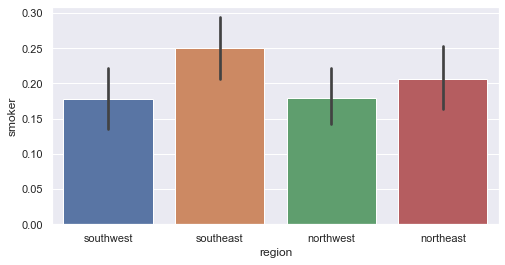

In [174]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="region", y="smoker", data=Smoker_Group)

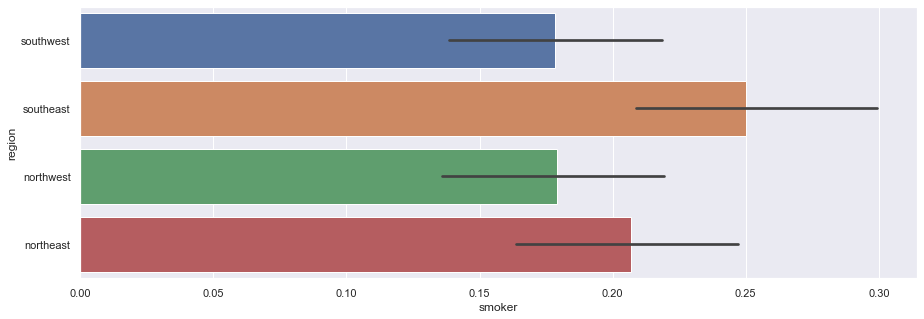

In [175]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='smoker', y='region', data=Smoker_Group)

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


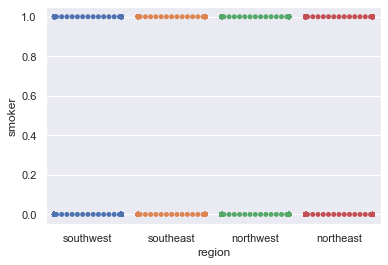

In [176]:
ax = sns.swarmplot(x="region", y="smoker", data=Smoker_Group,)

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


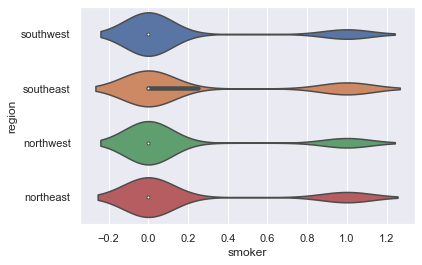

In [177]:
ax = sns.violinplot(Smoker_Group['smoker'], Smoker_Group['region'], )

The above barplot visualizations give us a pretty good indication that regions are not identical in regards to the ratio of smokers.  The range appears to be approximately 18% in the southwest and northwest regions up to around 25% in the southeast region. Due to the binary nature of the smoker data, swarmplots and violin plots are not particularly helpful for this investigation.  Also note that, although the regions do not appear identical visually, this does not mean the means of the regions are not equal within a 95% confidence level. To determine this, we must conduct statistical analysis on the numbers. 

Now that the smoker variable is in binary form, we can now test for correlation this variable for correlation with the other numerical variables.  We already suspect that smokers is positively correlated to charges. Lets take a look... 

In [178]:
Smoker_Group.corr() # now that smoker is in binary form, we can check correlations with other variables

,age,bmi,children,smoker,charges
age,1.000000,0.109344,0.041536,-0.025587,0.298308
bmi,0.109344,1.000000,0.012755,0.003746,0.198401
children,0.041536,0.012755,1.000000,0.007331,0.067389
smoker,-0.025587,0.003746,0.007331,1.000000,0.787234
charges,0.298308,0.198401,0.067389,0.787234,1.000000


As we suspected, smoker is very strongly correlated with charges. Lets look at a visual...

<function matplotlib.pyplot.show(close=None, block=None)>

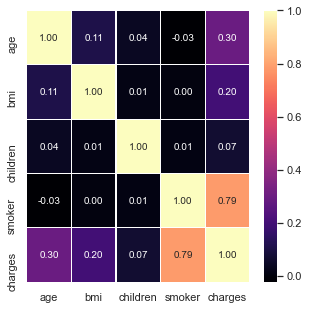

In [179]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Smoker_Group.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show

## Statistical Analysis

### Method 1:

This is perhaps the most efficient way to analyze the data.  Following the above-mentioned steps we get the following:

i) Find the observed values of smokers for each region
    
    NorthEast - 67
    NorthWest - 58
    SouthEast - 91 
    SouthWest - 58

ii) Calculate the expected values for each region: (total number of smokers/total customers) x total customers per region
    
    NorthEast - (274/1337) * 324 = 66.3994
    NorthWest - (274/1337) * 324 = 66.3994
    SouthEast - (274/1337) * 364 = 74.5969
    SouthWest - (274/1337) * 325 = 66.6043

iii) Run a Chi Square test using the expected numbers calculated above against the observed numbers in each region

### Step 1: Restate the null and alternate hypothesis from above

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ = $x̄_4$

Ha: $x̄_1$ != AT LEAST one of: $x̄_2$, $x̄_3$, $x̄_4$

where: 

$x̄_1$ = the ratio of smokers for the northeast region

$x̄_2$ = the ratio of smokers for the northwest region 

$x̄_3$ = the ratio of smokers for the southeast region

$x̄_4$ = the ratio of smokers for the southwest region

### Step 2: Decide the significance level

Here we select α = 0.05, which is equivalent to 95% confidence

### Step 3: Identify the test statistic

* Data type: Categorical
* We have four groups: NorthEast, NorthWest, SouthEast and SouthWest
* We have observed frequencies of smokers relative to total customers in each region
* Observed frequencies > 5
* We can use chi-square goodness of fit for this problem

**Chi-square goodness of fit** 

Chi-square statistic for goodness of fit is given by:

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

where $\chi^2$ is the chi square value and $O_{ij}$ is the Observed value and $E_{ij}$ is the expected value for a group

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution of data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

Source: Anova and Chi square-1.ipynb (available at: https://olympus.greatlearning.in/courses/29240

### Step 4: Calculate p value using chi-square goodness of fit

In [180]:
eNE = (274/1337) * 324 # The expected values will be the ratio of smokers to total customers multiplied by customers per region
eNW = (274/1337) * 324
eSE = (274/1337) * 364
eSW = (274/1337) * 325


observed_values = np.array([67, 58, 91, 58])
n = observed_values.sum()

expected_values = np.array([eNE, eNW, eSE, eSW])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.1224779


In [181]:
print(eNE)
print(eNW)
print(eSE)
print(eSW)


66.39940164547494
66.39940164547494
74.59685863874346
66.60433807030665


### Step 5:  Decide to reject or accept null hypothesis

The p value is 0.1225 and is > than 0.05, therefore we cannot reject the null hypothesis. 

## Conclusion: "Is the Proportion of Smokers Different Across Different Regions?"

We have demonstrated that the proportions of smokers are approximately equal with relative certainy. Our confidence level is set to 0.05, or 95% and the null hypothesis cannot be rejected at this confidence level. What this means is, the proportion of smokers in each region is equal to the proportion of smokers in the other three regions. The proportion of smokers in all regions are statistically equivalent at the 95% level. 

### Method 2:

Method 1 would be extremely difficult to follow for anyone not familiar with python. The second method will be more straightforward for managers of Axis Insurance. In the second method, we will separate out the different regions, essentially creating four distinct dataframes: Northeast, Northwest, Southeast and Southwest. The purpose of this is so that we can visually demonstrate to the Managers the individual counts for each region, calculate the distinct proportion of smokers relative to each sample size, and then conduct statistical analysis on the all four proportions using the Chi square test. For Managers with no background in python and little to no background in statistics, we believe this will be the simiplist method to follow. 

**Northeast**

In [182]:
Northeast = Smoker_Group.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [183]:
Northeast.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [184]:
ne = 0 #sets a counter to zero

for index in range(0,len(Northeast)): # The for loop will increase the ID value for each record
    if Northeast['region'].loc[index] == 'northwest':
        Northeast.drop([index], axis=0, inplace=True) 
    elif Northeast['region'].loc[index] == 'southeast':
        Northeast.drop([index], axis=0, inplace=True) 
    elif Northeast['region'].loc[index] == 'southwest':
        Northeast.drop([index], axis=0, inplace=True) 
    elif Northeast['region'].loc[index] == 'northeast':
        ne = ne + 1

In [185]:
Northeast.head() #to see if only northeast region is returned. Notice the index begins at 8, it will need to be reset. 

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,0,northeast,6406.41070
10,25,male,26.220,0,0,northeast,2721.32080
16,52,female,30.780,1,0,northeast,10797.33620
17,23,male,23.845,0,0,northeast,2395.17155
20,60,female,36.005,0,0,northeast,13228.84695


In [186]:
Northeast.reset_index(inplace=True) # This code resets the index so we can perform a second loop

In [187]:
s1 = 0
ns1 = 0

for index in range(0,len(Northeast)): # The for loop will increase the ID value for each record
    if Northeast['smoker'].loc[index] == 0:
        ns1 = ns1 + 1
    elif Northeast['smoker'].loc[index] == 1:
        s1 = s1 + 1

ps1 = s1/ne
pns1 = ns1/ne
        
print('There are', ne, 'people in the northeast')
print('')
print('There are', s1, 'smokers in the northeast')
print('There are', ns1, 'people in the northeast')
print('')
print('The proportion of smokers in the northeast is', ps1 )
print('The proportion of nonsmokers in the northeast is', pns1 )
    


There are 324 people in the northeast

There are 67 smokers in the northeast
There are 257 people in the northeast

The proportion of smokers in the northeast is 0.20679012345679013
The proportion of nonsmokers in the northeast is 0.7932098765432098


**Northwest**

In [188]:
Northwest = Smoker_Group.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [189]:
nw = 0 #sets a counter to zero

for index in range(0,len(Northwest)): # The for loop will increase the ID value for each record
    if Northwest['region'].loc[index] == 'northeast':
        Northwest.drop([index], axis=0, inplace=True) 
    elif Northwest['region'].loc[index] == 'southeast':
        Northwest.drop([index], axis=0, inplace=True) 
    elif Northwest['region'].loc[index] == 'southwest':
        Northwest.drop([index], axis=0, inplace=True) 
    elif Northwest['region'].loc[index] == 'northwest':
        nw = nw + 1

In [190]:
Northwest.reset_index(inplace=True) # This code resets the index so we can perform a second loop

In [191]:
s2 = 0
ns2 = 0

for index in range(0,len(Northwest)): # The for loop will increase the ID value for each record
    if Northwest['smoker'].loc[index] == 0:
        ns2 = ns2 + 1
    elif Northwest['smoker'].loc[index] == 1:
        s2 = s2 + 1

ps2 = s2/nw
pns2 = ns2/nw
        
print('There are', nw, 'people in the Northwest')
print('')
print('There are', s2, 'smokers in the Northwest')
print('There are', ns2, 'people in the Northwest')
print('')
print('The proportion of smokers in the Northwest is', ps2 )
print('The proportion of nonsmokers in the Northwest is', pns2 )


There are 324 people in the Northwest

There are 58 smokers in the Northwest
There are 266 people in the Northwest

The proportion of smokers in the Northwest is 0.17901234567901234
The proportion of nonsmokers in the Northwest is 0.8209876543209876


**Southeast**

In [192]:
Southeast = Smoker_Group.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [193]:
se = 0 #sets a counter to zero

for index in range(0,len(Southeast)): # The for loop will increase the ID value for each record
    if Southeast['region'].loc[index] == 'northwest':
        Southeast.drop([index], axis=0, inplace=True) 
    elif Southeast['region'].loc[index] == 'northeast':
        Southeast.drop([index], axis=0, inplace=True) 
    elif Southeast['region'].loc[index] == 'southwest':
        Southeast.drop([index], axis=0, inplace=True) 
    elif Southeast['region'].loc[index] == 'southeast':
        se = se + 1

In [194]:
Southeast.reset_index(inplace=True) # This code resets the index so we can perform a second loop

In [195]:
s3 = 0
ns3 = 0

for index in range(0,len(Southeast)): # The for loop will increase the ID value for each record
    if Southeast['smoker'].loc[index] == 0:
        ns3 = ns3 + 1
    elif Southeast['smoker'].loc[index] == 1:
        s3 = s3 + 1

ps3 = s3/se
pns3 = ns3/se
        
print('There are', se, 'people in the Southeast')
print('')
print('There are', s3, 'smokers in the Southeast')
print('There are', ns3, 'people in the Southeast')
print('')
print('The proportion of smokers in the Southeast is', ps3 )
print('The proportion of nonsmokers in the Southeast is', pns3 )


There are 364 people in the Southeast

There are 91 smokers in the Southeast
There are 273 people in the Southeast

The proportion of smokers in the Southeast is 0.25
The proportion of nonsmokers in the Southeast is 0.75


**Southwest**

In [196]:
Southwest = Smoker_Group.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY smokers

In [197]:
sw = 0 #sets a counter to zero

for index in range(0,len(Southwest)): # The for loop will increase the ID value for each record
    if Southwest['region'].loc[index] == 'northwest':
        Southwest.drop([index], axis=0, inplace=True) 
    elif Southwest['region'].loc[index] == 'southeast':
        Southwest.drop([index], axis=0, inplace=True) 
    elif Southwest['region'].loc[index] == 'northeast':
        Southwest.drop([index], axis=0, inplace=True) 
    elif Southwest['region'].loc[index] == 'southwest':
        sw = sw + 1

In [198]:
Southwest.reset_index(inplace=True) # This code resets the index so we can perform a second loop

In [199]:
s4 = 0
ns4 = 0

for index in range(0,len(Southwest)): # The for loop will increase the ID value for each record
    if Southwest['smoker'].loc[index] == 0:
        ns4 = ns4 + 1
    elif Southwest['smoker'].loc[index] == 1:
        s4 = s4 + 1

ps4 = s4/sw
pns4 = ns4/sw
        
print('There are', sw, 'people in the Southwest')
print('')
print('There are', s4, 'smokers in the Southwest')
print('There are', ns4, 'people in the Southwest')
print('')
print('The proportion of smokers in the Southwest is', ps4 )
print('The proportion of nonsmokers in the Southwest is', pns4 )
    
# Slightly counter-intuitive, but if the loop recognizes that sex = female, it will delete the row. This leaves only rows with sex = male


There are 325 people in the Southwest

There are 58 smokers in the Southwest
There are 267 people in the Southwest

The proportion of smokers in the Southwest is 0.17846153846153845
The proportion of nonsmokers in the Southwest is 0.8215384615384616


**Building Contingency Tables**

In [200]:
SC = pd.Series([s1,s2,s3,s4, '', s1+s2+s3+s4],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National Totals'])
NSC = pd.Series([ns1,ns2,ns3,ns4, '', ns1+ns2+ns3+ns4],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National Totals'])
Tots = pd.Series([s1+ ns1,s2+ns2,s3+ns3,s4+ns4, '', s1+s2+s3+s4+ns1+ns2+ns3+ns4],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National Totals'])

CT = pd.concat([SC,NSC,Tots,],axis=1,sort=False)

CT.columns=['Smoker','Non-Smoker','Regional Totals']
print('\033[1m' + 'Contingency Table (frequency counts)')
CT

Contingency Table (frequency counts)


,Smoker,Non-Smoker,Regional Totals
Northeast,67,257,324
Northwest,58,266,324
Southeast,91,273,364
Southwest,58,267,325
,,,
National Totals,274,1063,1337


In [201]:
SC1 = pd.Series([ps1,ps2,ps3,ps4, '', 274/1337],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National'])
NSC1 = pd.Series([pns1,pns2,pns3,pns4, '', 1063/1337],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National'])
Tots1 = pd.Series([ps1+pns1,ps2+pns2,ps3+pns3,ps4+pns4, '', 1337/1337],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest', '', 'National'])

CT1 = pd.concat([SC1,NSC1,Tots1,],axis=1,sort=False)

CT1.columns=['Smoker','Non-Smoker', 'Totals']
print('\033[1m' + 'Contingency Table (proportions)')
CT1

Contingency Table (proportions)


,Smoker,Non-Smoker,Totals
Northeast,0.20679,0.79321,1
Northwest,0.179012,0.820988,1
Southeast,0.25,0.75,1
Southwest,0.178462,0.821538,1
,,,
National,0.204936,0.795064,1


In [202]:
Smoker_Group['smoker'].mean() #check to see if the above calculated mean is consistent with that calculated by python... 

0.2049364248317128

The contingency tables above give us the proportions from four samples. It would be appropriate to use the Chi square test in this instance. Before we conduct statistical analysis, we can also graph the new contingency tables for a quick visual interpretation of the data. 

In [203]:
CT.info() #the first problem we encounter is the data in the dataframe is stored as 'object'... lets take a look...

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Northeast to National Totals
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Smoker           6 non-null      object
 1   Non-Smoker       6 non-null      object
 2   Regional Totals  6 non-null      object
dtypes: object(3)
memory usage: 192.0+ bytes


In [204]:
CT['Smoker'] = pd.to_numeric(CT['Smoker']) #this will convert 'object' string values to numeric
CT['Non-Smoker'] = pd.to_numeric(CT['Non-Smoker'])
CT['Regional Totals'] = pd.to_numeric(CT['Regional Totals'])

In [205]:
CT.info() #Smoker variables should now be float. lets check to see... 

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Northeast to National Totals
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Smoker           5 non-null      float64
 1   Non-Smoker       5 non-null      float64
 2   Regional Totals  5 non-null      float64
dtypes: float64(3)
memory usage: 192.0+ bytes


In [206]:
CT1['Smoker'] = pd.to_numeric(CT1['Smoker']) #this will convert 'objeCT1' string values to numeric
CT1['Non-Smoker'] = pd.to_numeric(CT1['Non-Smoker'])
CT1['Totals'] = pd.to_numeric(CT1['Totals'])

In [207]:
CT1.info() #Smoker variables should now be float. lets check to see... 

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Northeast to National
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Smoker      5 non-null      float64
 1   Non-Smoker  5 non-null      float64
 2   Totals      5 non-null      float64
dtypes: float64(3)
memory usage: 192.0+ bytes


For stats.chi2_contingency() we need one further table that excludes the national totals...

In [208]:
SC = pd.Series([s1,s2,s3,s4],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])
NSC = pd.Series([ns1,ns2,ns3,ns4],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])
              

CT2 = pd.concat([SC,NSC],axis=1,sort=False)

CT2.columns=['Smoker','Non-Smoker']
print('\033[1m' + 'Contingency Table (frequency counts)')
CT2

Contingency Table (frequency counts)


,Smoker,Non-Smoker
Northeast,67,257
Northwest,58,266
Southeast,91,273
Southwest,58,267


### Step 1: Restate the null and alternate hypothesis from above

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ = $x̄_4$

Ha: $x̄_1$ != AT LEAST one of: $x̄_2$, $x̄_3$, $x̄_4$

where: 

$x̄_1$ = the ratio of smokers for the northeast region

$x̄_2$ = the ratio of smokers for the northwest region 

$x̄_3$ = the ratio of smokers for the southeast region

$x̄_4$ = the ratio of smokers for the southwest region

### Step 2: Decide the significance level

Here we select α = 0.05, which is equivalent to 95% confidence

### Step 3: Identify the test statistic

* We have four groups: NorthEast, NorthWest, SouthEast and SouthWest
* We have observed frequencies of smokers relative to total customers in each region
* We have more than 5 observed frequencies
* We can build a contingency table of the observed frequencies
* We can use chi-square test of independence to test whether the groups have the same distribution for this problem because we do not know the underlying distribution

**Chi-square test of independence**

Chi-square test of independence is given by:

$\tilde{\chi}$ = $\sum_{i=1}^{n} = \frac{(O_i - E_i)^2}{E_i}$ 

where $\tilde{\chi}$ is the chi square value and $O_i$ is the Observed value and $E_i$ is the expected value for a group

The Chi-square goodness of fit test is a statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not. It is often used to evaluate whether sample data is representative of the full population.

Source: https://www.jmp.com/en_ca/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html#:~:text=The%20Chi%2Dsquare%20goodness%20of%20fit%20test%20is%20a%20statistical,representative%20of%20the%20full%20population.

### Step 4: Calculate p value using chi-square of independence

In [209]:
obs = [CT2] 
chi2, p, dof, expected = stats.chi2_contingency(obs)
print ('The p-value is',p)

The p-value is 0.06354826573182334


In [210]:
#running stats.chi2_contingency on the clean CT2 table

To check to see if the above code functioned properly, we can plug in the actual count values from the contingency table.  This allows for more transparency.  The p-value should be the same as above...

In [211]:
obs = ([67, 257, 324,], [58, 266, 324], [91, 273, 364], [58, 267, 325], [274, 1063, 1337])
chi2, p1, dof, expected = stats.chi2_contingency(obs)
print ('The p-value is',p1)


The p-value is 0.5069674472323892


### Step 5:  Decide to reject or accept null hypothesis

The p value is 0.507 and it is much more than our chosen level of significance at 5%. Using Method 2, we cannot reject the null hypothesis at 5% level of significance. The proportion of smokers in each region is equal to the proportion of smokers in every other region at this level of significance. 

## Conclusion: "Is the Proportion of Smokers Different Across Different Regions?"

The results are the same as in Method 1: the p-value is greater than 0.05, so we cannot reject the null hypothesis at the 95% confidence level. What this means is that there is no statistical difference between the proportion of smokers across different regions. For statistical purposes, at the 95% confidence level, the four regions have the same proportion of smokers. 

## Investigation 4: "Is the mean of BMI of women with no children, one child and two children the same?"

Although we already have a pretty good idea about the data from our previous investigative studies regarding BMI and women, we cannot allow what we already know influence our decisions. This would be equivalent of creating a biased hypothesis, or attempting to prove something we already believe to be true, regardless of what the data actually says. The null hypothesis will state that the means of these three populations are all the same. The alternate hypothesis will state that at least one of the means is different. 

**Stating the Hypotheses:**

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ 

Ha: AT LEAST one x̄ differs

where: 

$x̄_1$ = mean of bmi of women with no children

$x̄_2$ = mean of bmi of women with 1 child

$x̄_3$ = mean of bmi of women with 2 children

## Targeted Exploratory Data Analysis

In [212]:
AIC.head() #To remind us of the first cleaned copy of the original dataframe, the column headers, etc. 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can quickly run some loop programs on the dataframe to get frequency counts of each of the three variables of interest: women with no children, women with one child, women with two children

In [213]:
C0 = 0 #sets a counter to zero
C1 = 0
C2 = 0

for index in range(0,len(AIC)): # The for loop will increase the ID value for each record
    if AIC['sex'].loc[index] == 'female' and AIC['children'].loc[index] == 0:
        C0 = C0 + 1 # this will add a single count each time the parameters are met
    elif AIC['sex'].loc[index] == 'female' and AIC['children'].loc[index] == 1:
        C1 = C1 + 1 
    elif AIC['sex'].loc[index] == 'female' and AIC['children'].loc[index] == 2:
        C2 = C2 + 1 
        
print('There are', C0, 'females with 0 children') #print the outcomes in an informative manner
print('There are', C1, 'females with 1 child')
print('There are', C2, 'females with 2 children')


There are 289 females with 0 children
There are 158 females with 1 child
There are 119 females with 2 children


Conveniently, we also have a dataframe consistening of JUST females from Investigative Question # 2. We can check that dataframe just to ensure consistency of the data. 

In [214]:
Females.head() #checking the dataframe, helpful to see if we changed any categorical data to binary, etc.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [215]:
Females.reset_index(inplace=True) # We can see above that the index needs to be reset before a loop can be performed

In [216]:
FC0 = 0 # same as the above counter to count frequencies, but this will test to see if this ONLY female dataset matches the original
FC1 = 0
FC2 = 0

for index in range(0,len(Females)): # The for loop will increase the ID value for each record
    if Females['children'].loc[index] == 0:
        FC0 = FC0 + 1 
    elif Females['children'].loc[index] == 1:
        FC1 = FC1 + 1 
    elif Females['children'].loc[index] == 2:
        FC2 = FC2 + 1 
        
print('There are', FC0, 'females with 0 children')
print('There are', FC1, 'females with 1 child')
print('There are', FC2, 'females with 2 children')


There are 289 females with 0 children
There are 158 females with 1 child
There are 119 females with 2 children


This analysis matches the analysis we completed on the larger dataset, so we are now confident we have the right frequencies for the three different categories. We can conduct further Exploratory Data Analysis on the Females dataframe to see the mean, median, mode, etc.  The above output indicates that 0 would be the mode.  The question does not about females with more than 2 children, the max will tell us if there are females with more than 2. 

In [217]:
print(statistics.mode(Females['children'])) #tests our theory that 0 is the mode

0


In [218]:
Females['children'].describe()

count    662.000000
mean       1.074018
std        1.192115
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64

We see that there is at least one female with 5 children. We also see that there are 662 females in the sample. We can run further commands to figure out what proportion of women have less than 3 children.

In [219]:
FC3 = FC0+FC1+FC2
FC4 = 662 - FC3
print('There are', FC3, 'women with less than three children')
print('There are', FC4, 'women with three or more children')

There are 566 women with less than three children
There are 96 women with three or more children


## Visualizing the Data

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


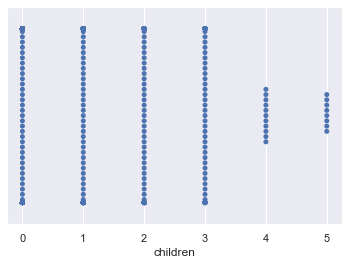

In [220]:
sns.swarmplot(data = Females, x='children'); #This graph will give us a nice visual of how the data is dispersed

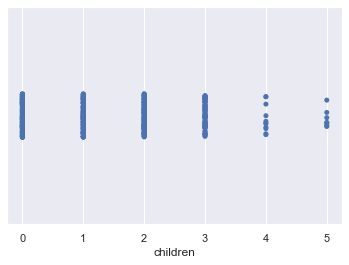

In [221]:
sns.stripplot(data = Females, x='children'); #This graph will collapse the spread of the data points from above

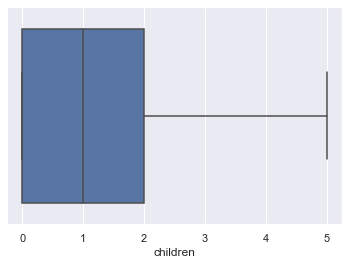

In [222]:
sns.boxplot(data = Females, x ='children',); #This graph visualizes the 4 quadriles and shows any outliers

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


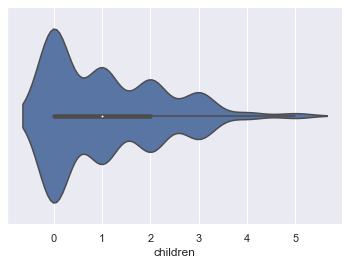

In [223]:
ax = sns.violinplot(Females['children'])

The first two plots (swarm and strip) are difficult to read. The swarm suggests that there are more data points at 0,1,2 and 3, than at 4 and 5, but it does not give us very much information beyond that, including how many more points and are there differences between frequencies at 0,1,2 and 3.  The bar plot is a bit better since it shows most of the data is actually around 0, 1 and 2, but it does not do much to differentiate between the number of children we are interested in.  The violin plot does the best job. It shows that 0 children is the highest frequency, which we knew from the counts, and women with 1 child is greater than women with two children. Now lets look at the bmi in conjunction with the number of children females have... 

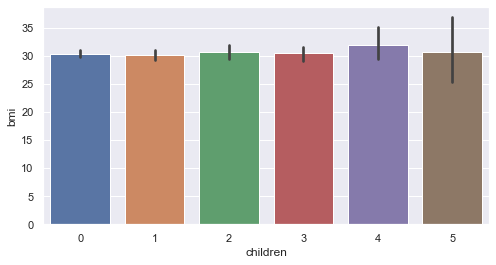

In [224]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="children", y="bmi", data=Females)

The above chart is difficult to read, especially considering half the data (3, 4 and 5) children are of no interest in this particular study. Since we do not need the data for females with 3 or more children, we can copy the dataframe and delete all of those rows, making a much more manageable dataframe for future work and the ability to graph just our data of interest. 

In [225]:
Females2 = Females.copy() # This creates a copy of the Females dataframe, which we can manipulate by dropping rows of 3 or more children

In [226]:
for index in range(0,len(Females2)): # The for loop will increase the ID value for each record  
    if Females2['children'].loc[index] >= 3:
        Females2.drop([index], axis=0, inplace=True) 
    
# THis should drop any row in the childrens column where children = 3, 4 or 5 (5 being the max - technically it will drop 3 or greater)

In [227]:
Females2.head() #checking the new dataframe

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92400
1,5,31,female,25.74,0,no,southeast,3756.62160
2,6,46,female,33.44,1,no,southeast,8240.58960
4,9,60,female,25.84,0,no,northwest,28923.13692
5,11,62,female,26.29,0,yes,southeast,27808.72510


In [228]:
Females2.describe() #We use this command and focus on the 'max' of children, it must be 2 for our purposes

,index,age,bmi,children,charges
count,566.000000,566.000000,566.000000,566.000000,566.000000
mean,663.215548,39.125442,30.335910,0.699647,12405.058539
std,386.072536,14.310470,6.055825,0.794828,11358.829450
min,0.000000,18.000000,16.815000,0.000000,1607.510100
25%,335.250000,26.000000,26.053750,0.000000,4371.572437
50%,652.500000,39.500000,29.972500,0.000000,9041.613500
75%,990.750000,51.000000,34.437500,1.000000,14399.313138
max,1336.000000,64.000000,48.070000,2.000000,63770.428010


In [229]:
Females2.reset_index(inplace=True) # This code resets the index so we can perform a second loop

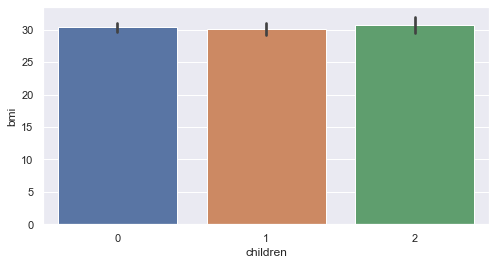

In [230]:
#Now lets re-graph the bmi vs number of children
plt.figure(figsize=(8,4))
ax = sns.barplot(x="children", y="bmi", data=Females2)

The above graphs show that the data looks relatively equal. However, from a statistical point of view, we cannot make this claim just yet.  The ANOVA test will allow us to test the equality of two or more population means by examining the variances of the sames that are taken. Our first step will be to rip the Females2 dataframe apart and create three new dataframes: Child0, Child1 and Child2.  As the names suggest, the data from Females2 will be divided into three separate dataframes based on the number of children the females have. Once that is complete, we can test for normal distribution and then we can compare the means of each dataframe. 

In [231]:
Child0 = Females2.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY females with 0 children

In [232]:
for index in range(0,len(Child0)): # The for loop will increase the ID value for each record  
    if Child0['children'].loc[index] >= 1:
        Child0.drop([index], axis=0, inplace=True) 
    
# This should drop all rows where children are 1 or greater

In [233]:
Child0.head()

,level_0,index,age,sex,bmi,children,smoker,region,charges
0,0,0,19,female,27.90,0,yes,southwest,16884.92400
1,1,5,31,female,25.74,0,no,southeast,3756.62160
3,4,9,60,female,25.84,0,no,northwest,28923.13692
4,5,11,62,female,26.29,0,yes,southeast,27808.72510
5,6,13,56,female,39.82,0,no,southeast,11090.71780


In [234]:
Child0.drop('level_0',axis=1,inplace=True) # just to clean up the dataframe
Child0.drop('index',axis=1,inplace=True)

In [235]:
Child0.describe() #two important things to look for here... count must equal 289 and max must equal 0

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


In [236]:
Child1 = Females2.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY females with 0 children

In [237]:
for index in range(0,len(Child1)): # The for loop will increase the ID value for each record  
    if Child1['children'].loc[index] == 0:
        Child1.drop([index], axis=0, inplace=True) 
    elif Child1['children'].loc[index] == 2:
        Child1.drop([index], axis=0, inplace=True) 
    
# This should drop all rows where children equal 0 AND where children equal 2 (<> signs not needed because we know the min = 0, max = 2)

In [238]:
Child1.head()

,level_0,index,age,sex,bmi,children,smoker,region,charges
2,2,6,46,female,33.44,1,no,southeast,8240.5896
6,7,16,52,female,30.78,1,no,northeast,10797.3362
8,9,21,30,female,32.40,1,no,southwest,4149.7360
9,10,23,34,female,31.92,1,yes,northeast,37701.8768
22,27,58,53,female,22.88,1,yes,southeast,23244.7902


In [239]:
Child1.drop('level_0',axis=1,inplace=True) # just to clean up the dataframe
Child1.drop('index',axis=1,inplace=True)

In [240]:
Child1.describe() #two important things to look for here... count must equal 158 and min & max must equal 1

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


In [241]:
Child2 = Females2.copy() # This creates a copy of the dataframe, which we can manipulate to include ONLY females with 0 children

In [242]:
for index in range(0,len(Child2)): # The for loop will increase the ID value for each record  
    if Child2['children'].loc[index] <= 1:
        Child2.drop([index], axis=0, inplace=True) 
    
# This should drop all rows where children are 1 or lower (we know 2 is the max, and this is the value we want to keep)

In [243]:
Child2.head()

,level_0,index,age,sex,bmi,children,smoker,region,charges
11,13,27,55,female,32.775,2,no,northwest,12268.63225
14,18,41,31,female,36.630,2,no,southeast,4949.75870
15,19,43,37,female,30.800,2,no,southeast,6313.75900
16,20,46,18,female,38.665,2,no,northeast,3393.35635
20,24,51,21,female,33.630,2,no,northwest,3579.82870


In [244]:
Child2.drop('level_0',axis=1,inplace=True) # just to clean up the dataframe
Child2.drop('index',axis=1,inplace=True)

In [245]:
Child2.describe() #two important things to look for here... count must equal 119 and min & max must equal 2

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


## Statistical Analysis

### Step 1: Restate the null and alternative hypothesis from above

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ 

Ha: AT LEAST one x̄ differs

Here $x̄_1$, $x̄_2$ and $x̄_3$ are the mean bmi of women with no children, women with 1 child and women with 2 children, respectively. 

### Step 2: Decide the significance level

Here we select α = 0.05, which is equivalent to 95% confidence

### Step 3: Identify the test statistic

* We have three groups: females with 0 children, females with 1 child, females with 2 children
* Analysis of variance can determine whether the means of these four groups are different
* ANOVA uses F-tests to statistically test the equality of the means. 

**One-way ANOVA**

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. The one-way ANOVA compares the means between the groups and determines whether any of those means are statistically significantly different from each other. Specifically, it tests the null hypothesis:

Ho: $x̄_1$ = $x̄_2$ = $x̄_3$ ... = $x̄_k$ 

where x̄ = group mean and k = number of groups. 

If there is not enough evidence to accept the Null Hypothesis, then one of the groups is statistically different from at least one of the others. The one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other, only that at least two groups were. To determine which specific groups differed from each other, you need to use a post hoc test.

Source: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

### Step 4: Calculate p value using ANOVA table

* First, we have to set up the ANOVA test, by determining the count, mean and standard deviation for each variable of interest
* Second, we need to create a dataframe of women with 0, 1 and 2 children, and the bmi 
* Third, we can create a visual boxplot of the data
* Fourth, we can conduct the ANOVA test using python

In [246]:
# First: setting up the ANOVA test

mean0 = Child0['bmi']
mean1 = Child1['bmi']
mean2 = Child2['bmi']

print('Count, Mean and standard deviation of mean of women with 0 children: %3d, %3.2f and %3.2f' % (len(mean0), mean0.mean(),np.std(mean0 ,ddof =1)))
print('Count, Mean and standard deviation of mean of women with 1 child: %3d, %3.2f and %3.2f' % (len(mean1), mean1.mean(),np.std(mean1,ddof =1)))
print('Count, Mean and standard deviation of mean of women with 2 children: %3d, %3.2f and %3.2f' % (len(mean2), mean2.mean(),np.std(mean2,ddof =1)))

Count, Mean and standard deviation of mean of women with 0 children: 289, 30.36 and 5.97
Count, Mean and standard deviation of mean of women with 1 child: 158, 30.05 and 5.79
Count, Mean and standard deviation of mean of women with 2 children: 119, 30.65 and 6.63


In [247]:
#Second: creating a dataframe with the count, mean and standard deviaiton derived from above
bmi_df = pd.DataFrame() 

df1 = pd.DataFrame({'children': '0', 'bmi':mean0})
df2 = pd.DataFrame({'children': '1', 'bmi':mean1})
df3 = pd.DataFrame({'children': '2', 'bmi':mean2})

bmi_df = bmi_df.append(df1) 
bmi_df = bmi_df.append(df2) 
bmi_df = bmi_df.append(df3) 

bmi_df # this will print our new dataframe

,children,bmi
0,0,27.900
1,0,25.740
3,0,25.840
4,0,26.290
5,0,39.820
...,...,...
554,2,34.700
556,2,26.315
557,2,40.370
559,2,24.225


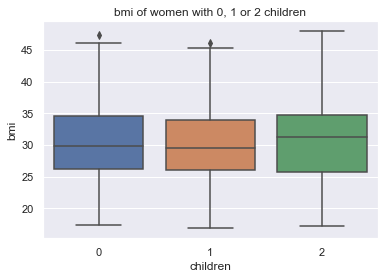

In [248]:
#Third: visulaizing the data with a boxplot

sns.boxplot(x = "children", y = "bmi", data = bmi_df)
plt.title('bmi of women with 0, 1 or 2 children')
plt.show()

The boxplots show pretty similar shapes and locations. Their spreads are similar as well. Women with zero children and women with one child have outliers above the whisker, while women with two children does not appear to have any outliers.  

In [249]:
#Fourth: conduct the ANOVA test

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

The p value is 0.7159 and it is much more than our chosen level of significance at 95%

So the statistical decision is that we cannot reject the null hypothesis at 95% level of significance.

## Conclusion: "Is the mean BMI of women with no children, one child and two children the same?"

There is sufficient evidence to suggest that we cannot reject the null hypothesis, which states that the mean bmis are equivalent. At the 95% confidence level, the mean BMI of women with no children, women with one child and women with two children are NOT statistically different.  

# Part 4: Presentation 

Below this point, additional visualizations, calculations and table creates were conducted in order to supplement the powerpoint presentation document. It is not in any particular order and is only included so the reader can follow how certain charts and tables that are present in the powerpoint presentation were created, if they are curious.  

In [250]:
Smoker_Group

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,0,northwest,10600.54830
1333,18,female,31.920,0,0,northeast,2205.98080
1334,18,female,36.850,0,0,southeast,1629.83350
1335,21,female,25.800,0,0,southwest,2007.94500


In [251]:
nechar = 0 # sets the count to 0, will allow us to count only people in the northeast
nwchar = 0 # sets the count to 0, will allow us to count only people in the northwest
sechar = 0 # sets the count to 0, will allow us to count only people in the southeast
swchar = 0 # sets the count to 0, will allow us to count only people in the southwest

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['region'].loc[index] == 'northeast':    
        nechar = nechar + AIC['charges'].loc[index]
    elif AIC['region'].loc[index] == 'northwest': 
        nwchar = nwchar + AIC['charges'].loc[index]
    elif AIC['region'].loc[index] == 'southeast': 
        sechar = sechar + AIC['charges'].loc[index]
    elif AIC['region'].loc[index] == 'southwest': 
        swchar = swchar + AIC['charges'].loc[index]
        
totalchar = nechar+nwchar+sechar+swchar
        
print('The average charge made by people in the Northeast is', nechar/324)
print('The average charge made by people  in the Northwest is', nwchar/324)
print('The average charge made by people  in the Southeast is', sechar/364)
print('The average charge made by people  in the Southwest is', swchar/325)
print('')
print('The average charge made by people in all regions is', totalchar/1337)

The average charge made by people in the Northeast is 13406.3845163858
The average charge made by people  in the Northwest is 12450.840843950615
The average charge made by people  in the Southeast is 14735.411437609895
The average charge made by people  in the Southwest is 12346.93737729231

The average charge made by people in all regions is 13279.121486655948


In [252]:
mchar = 0 # sets the count to 0, will allow us to count only people who are male
fchar = 0 # sets the count to 0, will allow us to count only people who are female


for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['sex'].loc[index] == 'male':    
        mchar = mchar + AIC['charges'].loc[index]
    elif AIC['sex'].loc[index] == 'female': 
        fchar = fchar + AIC['charges'].loc[index]
        
totalcharmf = mchar + fchar
        
print('The average charge made by males', mchar/675)
print('The average charge made by females', fchar/662)
print('')
print('The average charge made by people in all regions is', totalcharmf/1337)

The average charge made by males 13974.998863762954
The average charge made by females 12569.57884383534

The average charge made by people in all regions is 13279.121486655938


In [253]:
AIC.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [254]:
char0 = 0 # sets the count to 0, will allow us to count only people who are female with 0 children
char1 = 0 # sets the count to 0, will allow us to count only people who are female with 1 child
char2 = 0 # sets the count to 0, will allow us to count only people who are female with 2 children
char3 = 0 # sets the count to 0, will allow us to count only people who are female with 3 children
char4 = 0 # sets the count to 0, will allow us to count only people who are female with 4 children
char5 = 0 # sets the count to 0, will allow us to count only people who are female with 5 children

for index in range(0,len(AIC)): # The for loop will increase the ID value for each recor  
    if AIC['children'].loc[index] == 0 :    
        char0 = char0 + AIC['charges'].loc[index]
    elif AIC['children'].loc[index] == 1 :    
        char1 = char1 + AIC['charges'].loc[index]
    elif AIC['children'].loc[index] == 2 :    
        char2 = char2 + AIC['charges'].loc[index]
    elif AIC['children'].loc[index] == 3 :    
        char3 = char3 + AIC['charges'].loc[index]
    elif AIC['children'].loc[index] == 4 :    
        char4 = char4 + AIC['charges'].loc[index]
    elif AIC['children'].loc[index] == 5 :    
        char5 = char5 + AIC['charges'].loc[index]
    
totalcharc = char0 + char1 + char2 + char3 + char4 + char5
        
print('The average charge made by individuals with 0 children', char0/573)
print('The average charge made by individuals with 1 child', char1/324)
print('The average charge made by individuals with 2 children', char2/240)
print('The average charge made by individuals with 3 children', char3/157)
print('The average charge made by individuals with 4 children', char4/25)
print('The average charge made by individuals with 5 children', char5/18)
print('')
print('The average charge is', totalcharc/(573+324+240+157+25+18))

The average charge made by individuals with 0 children 12384.695344221636
The average charge made by individuals with 1 child 12731.171831635793
The average charge made by individuals with 2 children 15073.563733958328
The average charge made by individuals with 3 children 15355.31836681528
The average charge made by individuals with 4 children 13850.656311199999
The average charge made by individuals with 5 children 8786.035247222222

The average charge is 13279.121486655938


In [255]:
Smokers.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [256]:
NSmokers.describe()

,age,bmi,children,charges
count,1063.000000,1063.000000,1063.000000,1063.000000
mean,39.404516,30.651853,1.091251,8440.660307
std,14.076133,6.045956,1.218250,5992.973800
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,3988.883500
50%,40.000000,30.305000,1.000000,7345.726600
75%,52.000000,34.430000,2.000000,11363.019100
max,64.000000,53.130000,5.000000,36910.608030


In [257]:
a = (324 * 274)/1337
b = (324 * 274)/1337
c = (364 * 274)/1337
d = (325 * 274)/1337


e = (324 * 1063)/1337
f = (324 * 1063)/1337
g = (364 * 1063)/1337
h = (325 * 1063)/1337

ESC = pd.Series([a,b,c,d],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])
ENSC = pd.Series([e,f,g,h],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])


CTE = pd.concat([ESC,ENSC,],axis=1,sort=False)

CTE.columns=['Smoker','Non-Smoker']
print('\033[1m' + 'Contingency Table (Expected Counts)')
CTE

Contingency Table (Expected Counts)


,Smoker,Non-Smoker
Northeast,66.399402,257.600598
Northwest,66.399402,257.600598
Southeast,74.596859,289.403141
Southwest,66.604338,258.395662


In [258]:
ao = 7
bo = ((58 - ((324 * 274)/1337))*(58 - ((324 * 274)/1337)))/((324 * 274)/1337)
co = ((91 - ((364 * 274)/1337))*(91 - ((364 * 274)/1337)))/((364 * 274)/1337)
do = ((58 - ((325 * 274)/1337))*(58 - ((325 * 274)/1337)))/((325 * 274)/1337)

ESC = pd.Series([ao,bo,co,do],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])
ENSC = pd.Series([e,f,g,h],
               ['Northeast', 'Northwest', 'Southeast', 'Southwest'])


CTE = pd.concat([ESC,ENSC,],axis=1,sort=False)

CTE.columns=['Smoker','Non-Smoker']
print('\033[1m' + 'Contingency Table (Expected Counts)')
CTE

Contingency Table (Expected Counts)


,Smoker,Non-Smoker
Northeast,7.000000,257.600598
Northwest,1.062509,257.600598
Southeast,3.606895,289.403141
Southwest,1.111559,258.395662


In [259]:
ao

7

In [260]:
from scipy.stats import sem # allows us to find the standard error
sem(Smokers['charges'])

697.2503639985891

In [261]:
sem(NSmokers['charges'])

183.812798367294

In [262]:
AIC.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [263]:
NSmokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [264]:
Smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [265]:
x1 = Smokers['charges']

# sample for non-smokers
x2 = NSmokers['charges']

In [266]:
print(x1)

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1312    36397.57600
1313    18765.87545
1320    28101.33305
1322    43896.37630
1336    29141.36030
Name: charges, Length: 274, dtype: float64


In [267]:
x1.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [268]:
x2.describe()

count     1063.000000
mean      8440.660307
std       5992.973800
min       1121.873900
25%       3988.883500
50%       7345.726600
75%      11363.019100
max      36910.608030
Name: charges, dtype: float64

**Two Sample t Test (one-tailed test):**

Let x̄ and ȳ be the sample means and $s_x$ and $s_y$ be the sample standard deviations of two sets of data of size $n_x$ and $n_y$ respectively. $n_x$ and $n_y$ are sufficiently large for the Central Limit Theorem to hold:

$$t =  \frac{(32050.23 - 8440.66)}{\sqrt{\frac{11541.55^2}{274}+\frac{5992.97^2}{1063}}} = 32.74$$

where, degrees of freedom (df) is calculated as:

$$df =  \frac{\Big[{\frac{11541.55^2}{274}+\frac{5992.97^2}{1063}}\Big]^2}    {\Big[\frac{11541.554^4 }{274^2(274 - 1)}+\frac{5992.97^4}{1063^2(1063 - 1)}\Big]} = 311.88$$ 

$$t =  \frac{(\bar{x} - \bar{y})}{s\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$

has distribution T($n_x$ + $n_y$ – 2), where:

$$s^2 =  \frac{{(n_x-1)s_x^2} + {(n_y-1)s_y^2} }{{(n_x-1)}+{(n_y-1)}}$$

s, as defined above, can be viewed as a way to pool $s_x$ and $s_y$, and so $s^2$ is referred to as the pooled variance. Also, note that the degrees of freedom of t is the value of the denominator of $s^2$.

$$df =  {{(n_x-1)}+{(n_y-1)}}$$

In [269]:
bmi1.describe()

count    675.000000
mean      30.943652
std        6.144973
min       15.960000
25%       26.410000
50%       30.690000
75%       35.025000
max       53.130000
Name: bmi, dtype: float64

In [270]:
bmi2.describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

$$s^2 =  \frac{{(n_x-1)s_x^2} + {(n_y-1)s_y^2} }{{(n_x-1)}+{(n_y-1)}}$$

$$t =  \frac{(\bar{x} - \bar{y})}{s\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$

$$t =  \frac{(30.94 - 30.34)}{\sqrt37.16\sqrt{\frac{1}{675}+\frac{1}{662}}}$$

$$s^2 =  \frac{{(675-1)(6.14^2)} + {(662-1)(6.05^2)} }{{(675-1)}+{(662-1)}} = 37.16$$

$$t =  \frac{(30.94 - 30.34)}{\sqrt37.16\sqrt{\frac{1}{675}+\frac{1}{662}}} = 1.80 $$

$$df =  {{(675-1)}+{(662-1)}} = 1335$$

In [271]:
(30.94-30.34)/(6.09672043*0.054699684)


1.7991615136009556

$$df =  {{(675-1)}+{(662-1)}} = 1335$$

In [272]:
Child0.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,31,female,25.74,0,no,southeast,3756.62160
3,60,female,25.84,0,no,northwest,28923.13692
4,62,female,26.29,0,yes,southeast,27808.72510
5,56,female,39.82,0,no,southeast,11090.71780


In [273]:
Child0.describe()

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


In [274]:
sem(Child0['bmi'])

0.3509961311391915

In [275]:
print("Data_quantile(95%):",Child0.quantile(q=0.95))

Data_quantile(95%): age            63.00
bmi            40.23
children        0.00
charges     37215.65
Name: 0.95, dtype: float64


In [276]:
print("Data_quantile(5%):",Child0.quantile(q=0.05))

Data_quantile(5%): age           18.0000
bmi           21.5460
children       0.0000
charges     1743.7144
Name: 0.05, dtype: float64


In [277]:
Child1.head()

,age,sex,bmi,children,smoker,region,charges
2,46,female,33.44,1,no,southeast,8240.5896
6,52,female,30.78,1,no,northeast,10797.3362
8,30,female,32.40,1,no,southwest,4149.7360
9,34,female,31.92,1,yes,northeast,37701.8768
22,53,female,22.88,1,yes,southeast,23244.7902


In [278]:
Child1.describe()

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


In [279]:
sem(Child1['bmi'])

0.4603755593311364

In [280]:
print("Data_quantile(95%):",Child1.quantile(q=0.95))

Data_quantile(95%): age            57.150000
bmi            39.931750
children        1.000000
charges     39902.320268
Name: 0.95, dtype: float64


In [281]:
print("Data_quantile(5%):",Child1.quantile(q=0.05))

Data_quantile(5%): age           19.85000
bmi           21.52100
children       1.00000
charges     2718.01207
Name: 0.05, dtype: float64


In [282]:
Child2.head()

,age,sex,bmi,children,smoker,region,charges
11,55,female,32.775,2,no,northwest,12268.63225
14,31,female,36.630,2,no,southeast,4949.75870
15,37,female,30.800,2,no,southeast,6313.75900
16,18,female,38.665,2,no,northeast,3393.35635
20,21,female,33.630,2,no,northwest,3579.82870


In [283]:
Child2.describe()

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


In [284]:
sem(Child2['bmi'])

0.6076060926096594

In [285]:
print("Data_quantile(95%):",Child2.quantile(q=0.95))

Data_quantile(95%): age            59.200000
bmi            42.724000
children        2.000000
charges     40392.636655
Name: 0.95, dtype: float64


In [286]:
print("Data_quantile(5%):",Child2.quantile(q=0.05))

Data_quantile(5%): age           20.90000
bmi           19.90250
children       2.00000
charges     3571.90706
Name: 0.05, dtype: float64


$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

Data = Mean + Variation between Groups + Variation within Groups
$$y_{ij} =  \bar{y} + (\bar{y_i} - \bar{y}) + (y_{ij} - y_{i})$$

The Treatment Sume of Squares (SST) estimates the variation $between$ groups
$$SST = \sum_{i=1}^{k}n_i(\bar{y_i} - \bar{y})^2$$

The Error Sum of Squares (SSE) estimates the variation $within$ groups
$$SSE = \sum_{i=1}^{k}(n_i - 1)s_i^2$$

Total Variation (SSTotal):
$$SSTotal = SST + SSE$$

To turn these estimations of variation into variances, divide each sum of squares by its associated degrees of freedom:
$$MST = \frac{SST}{k - 1} and.MSE = \frac{SSE}{N - k}$$

The F-statistic tests the null hypothesis by taking the ratio of these two mean squares:
$$F_{k-1,N-k} = \frac{MST}{MSE}$$

The critical value and P-value depend on the two degrees of freedom: k - 1 and N - k

**Confidence Interval for the Difference Between Two Means**

When conditions are me, a *two-sample t-interval* for the diffence between means of two independent groups $\bar{x} - \bar{y}$ is
$$(\bar{x} - \bar{y}) ± t*_{df} x SE(\bar{x} - \bar{y})$$

Where the standard error of the difference of the means is:
$$SE(\bar{x} - \bar{y}) = {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

The critical value $t*_{df}$ depends on the particular confidence level and the number of degrees of freedom

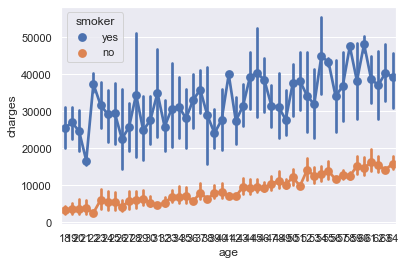

In [287]:
#Age vs Charges coloured by smoker
sns.pointplot(data = AIC,x='age', y= 'charges', hue='smoker'); 

In [288]:
Upper = NSmokers.copy() # This creates a copy of the dataframe

In [289]:
Upper.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [290]:
Upper.reset_index(inplace=True)

In [291]:
Upper.head()

,index,age,sex,bmi,children,smoker,region,charges
0,1,18,male,33.770,1,no,southeast,1725.55230
1,2,28,male,33.000,3,no,southeast,4449.46200
2,3,33,male,22.705,0,no,northwest,21984.47061
3,4,32,male,28.880,0,no,northwest,3866.85520
4,5,31,female,25.740,0,no,southeast,3756.62160


In [292]:
Upper.head()

,index,age,sex,bmi,children,smoker,region,charges
0,1,18,male,33.770,1,no,southeast,1725.55230
1,2,28,male,33.000,3,no,southeast,4449.46200
2,3,33,male,22.705,0,no,northwest,21984.47061
3,4,32,male,28.880,0,no,northwest,3866.85520
4,5,31,female,25.740,0,no,southeast,3756.62160


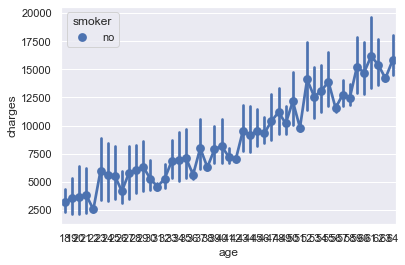

In [293]:
#Age vs Charges coloured by smoker
sns.pointplot(data = Upper,x='age', y= 'charges', hue='smoker'); 

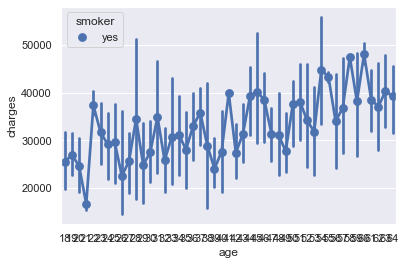

In [294]:
#Age vs Charges coloured by smoker
sns.pointplot(data = Smokers,x='age', y= 'charges', hue='smoker', scale=1); 

**From python:**

$\bar{x} = 32,050.23, \bar{y} = 8,440.66$

$s_1 = 697.25, s_2 = 183.81$

The observed difference between the means:

$\bar{x} - \bar{y} = 32,050.23 - 8,440.66 = 23,609.57$

and the Standard Error is:

$SE(s_1 - s_2) = 697.25 - 183.81 = 513.44$

**Confidence Interval (95%):**

The degrees of freedom is calculated as:

$df =  {{(274-1)}+{(1063-1)}} = 1335$

The 0.0025 (one-tail) critical value for t with 1335 degrees of freedom is 1.96, 

so the 95% confidence interval is:

$23,609.57 ± 1.96(513.44) = (22,603.23, 24,615.91)$

    